# Os falsetes da indústria musical


## Universidade de São Paulo

**Nomes:** 
* Eduardo Próspero Santana
* Julie Camolesi da Silva
* Yuri Reis Valete



**Nº USP:** 

* 11320731


* 11371284



* 10844171





## Resumo

Este projeto foi realizado para obtenção de nota na disciplina *SME0878 - Mineração Estatística de Dados* sob orientação do professor Francisco Aparecido Rodrigues. O trabalho visa realizar uma coleta de dados referentes a indústria musical, fazer análise exploratória e modelagem preditiva relacionada as informações obtidas.

Os dados foram coletados de diferentes fontes por meio detécnicas de *web scraping*, que é uma forma de 'garimpo' específica para as particularidades de cada site. Com ele extraímos bancos de dados não tratados que vão precisar ser limpos. Ele é feito por meio da biblioteca "requests" do Python.

Parte do projeto se encontra no github (https://github.com/eduardoprospero/Analise-de-dados-musicais).


## Introdução

Há tempos não muito longíquos, a indústria da música funcionava única e quase que exclusivamente de acordo com as pré-seleções das gravadoras de sucesso. Os denominados *hits* eram pré-selecionados e feitos de acordo com a vontade e influência da própria.

Com a chegada da internet, essa tendência vem diminuindo e cantores independentes têm cada vez mais se destacado em meio aos grandes sucessos.

Nesse trabalho, tentaremos investigar os seguintes pontos, considerando dados da década de 2010:


*   Quais gravadoras musicais têm mais influência na indústria?
*   O quanto um artista ser premiado com um Grammy influencia nas notas do álbum dadas pelo público e pelos críticos.
*   O quanto um artista ser premiado com um Grammy influencia nas vendas do álbum.
*   Modelo de regressão para previsão da opinião pública acerca dos álbuns musicais.






## Metodologia

Inicialmente faremos um web scraping dos cantores que fizeram mais sucesso na década passada.

Dentre as informações coletadas estão:    

* Músicas número 1 na Billboard[$^{[1]}$](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2010s);
* Álbuns mais bem avaliados do Metacritic pela crítica[$^{[2]}$](https://www.metacritic.com/browse/albums/score/metascore/year/filtered?sort=desc);
* Álbuns mais bem avaliados do Metacritic pelo público[$^{[3]}$](https://www.metacritic.com/browse/albums/score/userscore);
* Grammy de melhor álbum do ano [$^{[4]}$](https://en.wikipedia.org/wiki/Grammy_Award_for_Album_of_the_Year);
* Grammy de melhor artista novo do ano [$^{[5]}$](https://en.wikipedia.org/wiki/Grammy_Award_for_Best_New_Artist);
* Certificações da RIAA  [$^{[6]}$](https://www.riaa.com/gold-platinum/?tab_active=default-award&ar=&ti=&lab=&genre=&format=&date_option=release&from=2010-01-01&to=2019-12-31&award=&type=&category=&adv=SEARCH#search_section).

Aqui estão as bibliotecas que utilizaremos no projeto:

In [2]:
import requests
import re
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt 
%load_ext rpy2.ipython

### *Web Scraping*: Coletando os dados

#### Top 100 number one singles Billboard (2010 - 2019)

Billboard é uma revista estadunidense especializada em informações sobre a indústria musical. Dentre seus rankings selecionamos o _Hot 100_, que é o mais famoso dos seus. Ele mostra os 100 _singles_ mais vendidos e tocados nas rádios. É uma das principais formas de se medir a popularidade de um artista e de uma música.

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2010s")

# Convertendo a página para o bs

singles = bs(r.content)

Coletando somente a tabela presente na página:

In [ ]:
tabela = singles.find("table", class_= "wikitable")

Coletando o nome das variáveis:

In [ ]:
# filtrando os títulos de cada variável
titulos = tabela.tr

# colocando os titulos em um vetor
titulos = titulos.find_all("th")
print(titulos)
# "limpando" os titulos
b = [i.string for i in titulos]

titulos = b
print(titulos)
# no lugar onde se era para ter a variável "weeks at number one" o código
# retorna None, como se trata de um caso isolado, vamos alterar manualmente

titulos[4] = "weeks at number one"

# resultado obtido
print(titulos)

[<th>#
</th>, <th>Reached number one
</th>, <th>Artist(s)
</th>, <th>Single
</th>, <th>Weeks at<br/>number one
</th>, <th>Reference
</th>]
['#\n', 'Reached number one\n', 'Artist(s)\n', 'Single\n', None, 'Reference\n']
['#\n', 'Reached number one\n', 'Artist(s)\n', 'Single\n', 'weeks at number one', 'Reference\n']


Variáveis como "#" e "Reference" não adicionam informações que serão utilizadas, vamos removê-las portanto.

In [ ]:
titulos = titulos[1:5]
print(titulos)

['Reached number one\n', 'Artist(s)\n', 'Single\n', 'weeks at number one']


Agora que possuímos os títulos de nossas variáveis, vamos à coleta dos dados.

In [ ]:
dados = []

if tabela is not None:
    rows = tabela.find_all('tr')
    for tr in rows:
        cols = tr.find_all('td')
        for td in cols:
            dados.append(td.text.strip())

data = [dados[i] for i in range(1,len(dados), 6)]
artistas = [dados[i] for i in range(2,len(dados), 6)]
single = [dados[i] for i in range(3,len(dados), 6)]
semana_n_1 = [dados[i] for i in range(4,len(dados), 6)]

Criando um data frame em pandas:

In [ ]:
dados = {"data" : data,
         "artistas" : artistas, 
         "single" : single,
         "semanas como numero 1" : semana_n_1
         }

# excluindo \n's dos títulos

titulos = [i.replace("\n", "") for i in titulos]

df_singles = pd.DataFrame(dados)
df_singles = df_singles.fillna(value=np.nan)
df_singles

,data,artistas,single,semanas como numero 1
0,"January 2, 2010",Kesha,"""Tik Tok""♪ [4]",9
1,"March 6, 2010",The Black Eyed Peas,"""Imma Be""",2
2,"March 20, 2010",Taio Cruz featuring Ludacris,"""Break Your Heart""",1
3,"March 27, 2010",Rihanna,"""Rude Boy""",5
4,"May 1, 2010",B.o.B featuring Bruno Mars,"""Nothin' on You""",2
...,...,...,...,...
111,"November 2, 2019",Lewis Capaldi,"""Someone You Loved""",3
112,"November 9, 2019",Selena Gomez,"""Lose You to Love Me""",1
113,"November 30, 2019",Post Malone,"""Circles""",3
114,"December 14, 2019",The Weeknd,"""Heartless""",1


#### Top álbuns - Metacritic (2010 - 2019)

Metacritic é um website estadunidense que reúne críticas de álbuns, videogames, filmes, programas de televisão, DVDs e livros. Para cada produto, um valor numérico de cada crítica é computado e daí retirado uma média aritmética ponderada. Cada nota é convertida para uma nota percentual, com alguns veículos recebendo um peso maior dependendo da categoria. O site apresenta ainda a possibilidade dos usuários cadastrados publicarem suas críticas, a fim de medir a opinião pública a respeito das obras. Neste projeto, a nota do público (_user score_) será a variável resposta do nosso modelo.

In [ ]:
link = "https://www.metacritic.com/browse/albums/score/metascore/year/filtered?sort=desc"

r = requests.get(url = link, headers={'User-Agent': 'Mozilla/5.0'})

meta_albuns = bs(r.content)

Este link nos direciona para o metacritic do ano atual, mas queremos do período entre 2010 - 2019, que pode ser selecionado em um botão presente no site. Vamos acessar esse botão por meio do *web scraping* em beautifulsoup e extrair todos os links desse período.

##### Coletando todas as páginas:

In [ ]:
# Filtrando apenas o corpo da página

corpo = meta_albuns.find("body")

# do corpo da página, coletando apenas o centro (retirando anuncios e links)
# desnecessários

centro_corpo = corpo.find('div', class_="title_bump")

# do centro, pegando apenas a parte de cima, que contém botões de navegação

titulo = centro_corpo.find("div", class_="list_controls")

# da parte de cima, coletando apenas o botão que nos levará para os anos
# que utilizaremos

botao = titulo.find("div", class_="mcmenu dropdown style2 year")

# pegando todos os anos possíveis

anos = botao.find_all("a")

# filtrando do período de 2010 - 2019
anos = anos[2:12]

# pegando todos os links que nos levarão as páginas desejadas
link_anos = []
for i in range(0,10):
  link_anos.append(anos[i]["href"])

Podemos observar que obtivemos apenas a parte posterior dos links que queremos obter, estando em falta o link do site geral (www.metacritic.com).

Vamos adicioná-la manualmente.

In [ ]:
# inserindo o site à lista de hyperlinks obtidas acima
string = 'http://www.metacritic.com'
link_anos = [string + i for i in link_anos]

# mudando o formato de página para um mais simples de extrair dados
link_anos = [i.replace("detailed", "condensed") for i in link_anos]

texto = "&page="

paginas = list(range(0,10))

link_paginas = []

for j in link_anos:
  for i in paginas:
    link_paginas.append(f"{j}{texto}{i}")

Agora que temos uma lista com todos os links, vamos realizar um _web scraping_ múltiplo, extraindo de todos eles a lista dos melhores artistas (pelo metacritic).

##### Funções base

Aqui estão algumas funções que nos auxiliarão na coleta de dados do metacritic:

In [ ]:
# update: Percebi que tem mais informação sobre o álbum quando voce vai na
# página dele, como as gravadoras e os generos

# No metacritics as páginas estão divididas em 4 partes. A função a seguir
# serve para pegar essas 4 partes

def pega_tops(bs):
  top5 = bs.find("div", class_='browse_list_wrapper one browse-list-large')
  # pode ser que por manutenção do site, mudança da forma de url ou apenas
  # por ter escolhido uma página fora do limite o código retore "None" na coleta
  # de dados na página, para fazer com que a função continue rodando coloquemos
  # algumas condicionais
  if top5 == None:
    print("Erro: não foi possível encontrar esta página")
    top510 = None
    top1015 = None
    topresto = None
    return top5, top510, top1015, topresto
  else:
    top510 = bs.find("div", class_='browse_list_wrapper two browse-list-large')

  if top510 == None:
    print("Erro: não foi possível encontrar o resto desta página")
    top1015 = None
    topresto = None
    return top5, top510, top1015, topresto

  else:
    top1015 = bs.find("div", class_='browse_list_wrapper three browse-list-large')
  if top1015 == None:
    print("Erro: não foi possível encontrar o resto desta página")
    topresto = None
    return top5, top510, top1015, topresto
  else: 

    topresto = bs.find("div", class_='browse_list_wrapper four browse-list-large')
  if topresto == None:
    print("Erro: não foi possível encontrar o resto desta página")
    return top5, top510, top1015, topresto
  else:
    return top5, top510, top1015, topresto

# Função que coleta todos os títulos presentes na página e une em uma única lista

def coleta_titulos(top5, top510, top1015, topresto):
  titulos_top5 = top5.find_all("h3")
  titulos_top510 = top510.find_all("h3")
  titulos_top1015 = top1015.find_all("h3")
  titulos_topresto = topresto.find_all("h3")

  titulos = titulos_top5 + titulos_top510 + titulos_top1015 + titulos_topresto

  # removendo o "user score" da lista de titulos
  titulos = [titulos[i] for i in range(0,len(titulos), 2)]

  # removendo <h3> e </h3> da lista de titulos
  titulos = [i.text for i in titulos]

  return titulos

# Função que elimina partes desnecessárias do texto que possui o nome do artista

def limpa_artista(x):

  new_set = []
  for i in x:
    new_string = i.replace("  ", "")
    new_string = new_string.replace("\n", "")
    new_string = new_string.replace("by ", "")
    new_set.append(new_string)

  return new_set

# Função que coleta o nome dos artistas na página

def pega_artista(top5, top510, top1015, topresto):
  # pegando o nome dos artistas
  artista_top5 = top5.find_all("div", class_="artist")
  artista_top510 = top510.find_all("div", class_="artist")
  artista_top1015 = top1015.find_all("div", class_="artist")
  artista_topresto = topresto.find_all("div", class_="artist")

  # filtrando apenas o texto da lista
  artista_top5 = [i.text for i in artista_top5]
  artista_top510 = [i.text for i in artista_top510]
  artista_top1015 = [i.text for i in artista_top1015]
  artista_topresto = [i.text for i in artista_topresto]

  artista_top5 = limpa_artista(artista_top5)
  artista_top10 = limpa_artista(artista_top510)
  artista_top1015 = limpa_artista(artista_top1015)
  artista_topresto = limpa_artista(artista_topresto)

  lista_artistas = artista_top5 + artista_top10 + artista_top1015 + artista_topresto

  return lista_artistas

# função que coleta o metascore de cada album

def pega_notas(top5, top510, top1015, topresto):
  # notas positivas no top 5
  top5_nota1 = top5.find_all("div", 
                               class_="metascore_w large release positive")
  
  # notas medianas no top 5
  top5_nota2 = top5.find_all("div", 
                               class_="metascore_w large release mixed")
  
  # notas negativas no top 5
  top5_nota3 = top5.find_all("div", 
                               class_="metascore_w large release negative")
  
  # todas as notas do top 5
  top5_nota = top5_nota1 + top5_nota2 + top5_nota3


  top510_nota1 = top510.find_all("div", 
                                   class_="metascore_w large release positive")
  
  top510_nota2 = top510.find_all("div", 
                                   class_="metascore_w large release mixed")
  
  top510_nota3 = top510.find_all("div", 
                                   class_="metascore_w large release negative")
  
  top510_nota = top510_nota1 + top510_nota2 + top510_nota3

  top1015_nota1 = top1015.find_all("div", 
                                     class_="metascore_w large release positive")
  
  top1015_nota2 = top1015.find_all("div", 
                                     class_="metascore_w large release mixed")
  
  top1015_nota3 = top1015.find_all("div", 
                                     class_="metascore_w large release negative")
  
  top1015_nota = top1015_nota1 + top1015_nota2 + top1015_nota3
  topresto_nota1 = topresto.find_all("div", 
                                       class_="metascore_w large release positive")
  
  topresto_nota2 = topresto.find_all("div", 
                                       class_="metascore_w large release mixed")
  
  topresto_nota3 = topresto.find_all("div", 
                                       class_="metascore_w large release negative")
                                       
  topresto_nota = topresto_nota1 + topresto_nota2 + topresto_nota3

  lista_notas = top5_nota + top510_nota + top1015_nota + topresto_nota

  # filtrando apenas o numero da lista de notas
  lista_notas = [i.string for i in lista_notas]  

  return lista_notas

# função que pega as referencias da página

def pega_link(bs):
  # pegando todos os links que nos levarão as páginas desejadas
  bs = bs.find_all("a", class_="title")
  a = len(bs)
  link = []
  for i in range(0,a):
    link.append(bs[i]["href"])
  return link

# completa o link com "metacritcs.com" para se tornar acessável pelo bs4
def completa_link(bs):
  string1 = 'http://www.metacritic.com'
  bs = [string1 + i for i in bs]
  return bs

# acessa as páginas dos albuns e extrai genero e produtora
def mais_info(top5, top510, top1015, topresto):
  a = pega_link(top5)
  b = pega_link(top510)
  c = pega_link(top1015)
  d = pega_link(topresto)

  # juntando todos os links em uma unica lista
  links = a + b + c + d

  # corrigindo todos os links
  links = completa_link(links)

  gravadora = []
  genero = []
  genero2 = []

  for i in links:
    link = i
    r = requests.get(url = link, headers={'User-Agent': 'Mozilla/5.0'})
    conteudo = bs(r.content)
    corpo = conteudo.find("body")
    if corpo == None:
      genero.append('NaN')
      genero2.append('NaN')
      gravadora.append('NaN')
      print("Não foi possível encontrar informações adicionais do artista")
      continue
    else:
      corpo2 = corpo.find("div", 
                          class_="module product_data product_data_summary")
    if corpo2 == None:
      genero.append('NaN')
      genero2.append('NaN')
      gravadora.append('NaN')
    else:
      detalhes = corpo2.find("div", class_="section product_details")
      detalhes = detalhes.find("div", class_="details side_details")
      info = detalhes.find_all("span", "data")
      gravadora.append(info[0].text)
      if (len(info) <= 1) == True:
        genero.append('NaN')
      elif (len(info) > 1) == True:
        genero.append(info[1].text)
      if (len(info) <= 2) == True:
        genero2.append('NaN')
      elif (len(info) > 2) == True:
        genero2.append(info[2].text)
  
  return gravadora, genero, genero2

##### Função extratora de dados

Aqui criaremos uma função que extrai um dataframe com os dados de todos os álbuns presentes em cada período.

In [ ]:
def extrator_metacritic(link):
  print(link)
  r = requests.get(url = link, headers={'User-Agent': 'Mozilla/5.0'})
  meta_albuns = bs(r.content)
  corpo = meta_albuns.find("body")

  # O site do metacritics cai em alguns momentos em páginas específicas, criei 
  # um loop para resetar a página até ela extrair alguma informação
  printed = False
  while corpo == None:
    time.sleep(0.5)
    r = requests.get(url = link, headers={'User-Agent': 'Mozilla/5.0'})
    meta_albuns = bs(r.content)
    corpo = meta_albuns.find("body")

    if corpo == None and not printed:
        print("Erro: Página não respondendo, atualizando...")
        printed = True

  # No site do metacrits, existem separadores entre os top5, do top5 ao 10 e do 
  # 10 ao 15, do 15 em diante não existem mais separadores. utilizando a função
  # criada "pega_tops, coletamos essas partes"

  top5, top510, top1015, topresto = pega_tops(corpo)
  
  if (top5 == None):
    lista_titulos = [None] 
    lista_datas = [None]
    lista_artistas = [None]
    lista_titulos = [None]
    lista_notas = [None]
    produtora = [None]
    genero= [None]
    genero2 = [None]
    dados = {"data" : lista_datas,
         "artistas" : lista_artistas, 
         "album" : lista_titulos,
         "nota metascore" : lista_notas,
         "gravadoras" : produtora,
         "genero" : genero,
         "genero2" : genero2
         }
    df = pd.DataFrame(dados)
    return df
  else:

  # coletando os títulos dos albuns 

    lista_titulos = coleta_titulos(top5, top510, top1015, topresto)

  # coletando o nome dos artístas

    lista_artistas = pega_artista(top5, top510, top1015, topresto)

  # Pegando o valor da nota do metacritics
    lista_notas = pega_notas(top5, top510, top1015, topresto)

  # pegando as datas
    top5_data = top5.find_all("span", class_= None)
    top510_data = top510.find_all("span", class_= None)
    top1015_data = top1015.find_all("span", class_= None)
    topresto_data = topresto.find_all("span", class_= None)

  # filtrando apenas a data das listas
    top5_data = [i.string for i in top5_data]
    top510_data = [i.string for i in top510_data]
    top1015_data = [i.string for i in top1015_data]
    topresto_data = [i.string for i  in topresto_data]

    lista_datas = top5_data + top510_data + top1015_data + topresto_data

  # update: função que pega mais informações do album
    produtora, genero, genero2 = mais_info(top5,top510,top1015,topresto)

    # criando o data frame
    dados = {"data" : lista_datas,
          "artistas" : lista_artistas, 
          "album" : lista_titulos,
          "nota metascore" : lista_notas,
          "gravadoras" : produtora,
          "genero" : genero,
          "genero2" : genero2
          }
    df = pd.DataFrame(dados)
    return df

##### Criando o data frame
Nesta seção unimos os dados de todos os álbuns do período de 2010-2019 presentes no site. 

In [ ]:
df_meta_score = pd.DataFrame()

for i in link_paginas:
  df_meta_score = pd.concat([df_meta_score, extrator_metacritic(i)])

http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=0
http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=1
http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=2
http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=3
http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=4
http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=5
http://www.metacritic.com/browse/albums/score/metascore/year/filtered?year_selected=2019&distribution=&sort=desc&view=condensed&page=6
Erro: não foi possível encontrar esta página
http://www

In [ ]:
df_meta_score

,data,artistas,album,nota metascore,produtoras,genero,genero2
0,"October 4, 2019",Nick Cave & the Bad Seeds,Ghosteen,96,Ghosteen,Pop/Rock,NaN
1,"April 5, 2019",Weyes Blood,Titanic Rising,91,Sub Pop,Pop/Rock,Alternative/Indie Rock
2,"March 1, 2019",Little Simz,Grey Area,91,Age 101,Rap,NaN
3,"June 14, 2019",Baroness,Gold & Grey,91,Abraxan Hymns,Pop/Rock,Heavy Metal
4,"August 23, 2019",Raphael Saadiq,Jimmy Lee,90,Columbia,R&B,NaN
...,...,...,...,...,...,...,...
49,"September 21, 2010",Santana,Guitar Heaven: The Greatest Guitar Classics of...,45,Arista,Pop/Rock,Adult Alternative Pop/Rock
50,"June 22, 2010",Cyndi Lauper,Memphis Blues,45,Downtown,Pop,NaN
51,"February 2, 2010",Lil Wayne,Rebirth,37,Cash Money Records,Rap,NaN
0,None,None,None,None,None,None,None


In [ ]:
# removendo linhas sem informação nenhuma
df_meta_score = df_meta_score.dropna(axis = 0 ,how= 'all')

In [ ]:
df_meta_score

,data,artistas,album,nota metascore,produtoras,genero,genero2
0,"October 4, 2019",Nick Cave & the Bad Seeds,Ghosteen,96,Ghosteen,Pop/Rock,NaN
1,"April 5, 2019",Weyes Blood,Titanic Rising,91,Sub Pop,Pop/Rock,Alternative/Indie Rock
2,"March 1, 2019",Little Simz,Grey Area,91,Age 101,Rap,NaN
3,"June 14, 2019",Baroness,Gold & Grey,91,Abraxan Hymns,Pop/Rock,Heavy Metal
4,"August 23, 2019",Raphael Saadiq,Jimmy Lee,90,Columbia,R&B,NaN
...,...,...,...,...,...,...,...
47,"June 8, 2010",Rooney,Eureka,47,California Dreamin',Rock,Pop
48,"October 11, 2010",Paul Smith,Margins,46,TOAST,Pop/Rock,Alternative/Indie Rock
49,"September 21, 2010",Santana,Guitar Heaven: The Greatest Guitar Classics of...,45,Arista,Pop/Rock,Adult Alternative Pop/Rock
50,"June 22, 2010",Cyndi Lauper,Memphis Blues,45,Downtown,Pop,NaN


#### Metacritic - User Score (2010 - 2019)
O _user score_ é a média das notas atribuídas pelo público geral no site do Metacritic.

###### Coletando todas as páginas

In [ ]:
# podemos mudar a página que vamos acessar por meio do url, vamos então tentar
# coletar o máximo de userscore possíveis

link = "https://www.metacritic.com/browse/albums/score/userscore/all/filtered?view=condensed&sort=desc&page=#"

link_us = []

for i in range(0,92):
  a = str(i)
  link_us.append(link.replace("#", a))

92

##### Função extratora de dados

In [ ]:
def extrator_US(link):
  r = requests.get(url = link, headers={'User-Agent': 'Mozilla/5.0'})
  user_score = bs(r.content)
  time.sleep(1)

  while user_score == None:
    time.sleep(0.5)
    r = requests.get(url = link, headers={'User-Agent': 'Mozilla/5.0'})
    meta_albuns = bs(r.content)
    user_score = meta_albuns.find("body")

    if corpo == None and not printed:
        print("Erro: Página não respondendo, atualizando...")
        printed = True
  
  top5 = user_score.find("div", class_="browse_list_wrapper one browse-list-large")
  top510 =user_score.find("div", class_="browse_list_wrapper two browse-list-large")
  top1015 =user_score.find("div", class_="browse_list_wrapper three browse-list-large")
  topresto =user_score.find("div", class_="browse_list_wrapper four browse-list-large")

  # titulos

  titulos_top5 = top5.find_all("h3")
  titulos_top510 = top510.find_all("h3")
  titulos_top1015 = top1015.find_all("h3")
  titulos_topresto = topresto.find_all("h3")

  lista_titulos = titulos_top5 + titulos_top510 + titulos_top1015 + titulos_topresto

  lista_titulos = [lista_titulos[i] for i in range(0,len(lista_titulos), 2)]
  lista_titulos = [i.text for i in lista_titulos]

  # pegando o nome dos artistas
  artista_top5 = top5.find_all("div", class_="artist")
  artista_top510 = top510.find_all("div", class_="artist")
  artista_top1015 = top1015.find_all("div", class_="artist")
  artista_topresto = topresto.find_all("div", class_="artist")

  # filtrando apenas o texto da lista
  artista_top5 = [i.text for i in artista_top5]
  artista_top510 = [i.text for i in artista_top510]
  artista_top1015 = [i.text for i in artista_top1015]
  artista_topresto = [i.text for i in artista_topresto]

  lista_artistas = artista_top5 + artista_top510 + artista_top1015 + artista_topresto

  def limpa_artista(x):

    new_set = []
    for i in x:
      new_string = i.replace("  ", "")
      new_string = new_string.replace("\n", "")
      new_string = new_string.replace("by ", "")
      new_set.append(new_string)

    return new_set

  artista_top5 = limpa_artista(artista_top5)
  artista_top510 = limpa_artista(artista_top510)
  artista_top1015 = limpa_artista(artista_top1015)
  artista_topresto = limpa_artista(artista_topresto)
  lista_artistas = artista_top5 + artista_top510 + artista_top1015 + artista_topresto

 # Pegando o valor da nota do metacritics
  top5_nota = top5.find_all("div", class_="metascore_w user large release positive")
  top510_nota = top510.find_all("div", class_="metascore_w user large release positive")
  top1015_nota = top1015.find_all("div", class_="metascore_w user large release positive")
  topresto_nota = topresto.find_all("div", class_="metascore_w user large release positive")
  lista_notas = top5_nota + top510_nota + top1015_nota + topresto_nota

  if len(lista_notas) != 100:
    top5_nota1 = top5.find_all("div", class_="metascore_w user large release positive")
    top5_nota2 = top5.find_all("div", class_="metascore_w user large release mixed")
    top5_nota3 = top5.find_all("div", class_="metascore_w user large release negative")
    top5_nota = top5_nota1 + top5_nota2 + top5_nota3
    top510_nota1 = top510.find_all("div", class_="metascore_w user large release positive")
    top510_nota2 = top510.find_all("div", class_="metascore_w user large release mixed")
    top510_nota3 = top510.find_all("div", class_="metascore_w user large release negative")
    top510_nota = top510_nota1 + top510_nota2 + top510_nota3
    top1015_nota1 = top1015.find_all("div", class_="metascore_w user large release positive")
    top1015_nota2 = top1015.find_all("div", class_="metascore_w user large release mixed")
    top1015_nota3 = top1015.find_all("div", class_="metascore_w user large release negative")
    top1015_nota = top1015_nota1 + top1015_nota2 + top1015_nota3
    topresto_nota1 = topresto.find_all("div", class_="metascore_w user large release positive")
    topresto_nota2 = topresto.find_all("div", class_="metascore_w user large release mixed")
    topresto_nota3 = topresto.find_all("div", class_="metascore_w user large release negative")
    topresto_nota = topresto_nota1 + topresto_nota2 + topresto_nota3

  # filtrando apenas o numero da lista de notas
  top5_nota = [i.string for i in top5_nota]
  top510_nota = [i.string for i in top510_nota]
  top1015_nota = [i.string for i in top1015_nota]
  topresto_nota = [i.string for i in topresto_nota]

  lista_notas = top5_nota + top510_nota + top1015_nota + topresto_nota
  
  # pegando as datas
  top5_data = top5.find_all("span", class_= None)
  top510_data = top510.find_all("span", class_= None)
  top1015_data = top1015.find_all("span", class_= None)
  topresto_data = topresto.find_all("span", class_= None)

  # filtrando apenas a data das listas
  top5_data = [i.string for i in top5_data]
  top510_data = [i.string for i in top510_data]
  top1015_data = [i.string for i in top1015_data]
  topresto_data = [i.string for i in topresto_data]

  lista_datas = top5_data + top510_data + top1015_data + topresto_data

  # Pegando dados de produtora e genero

  produtora, genero, genero2 = mais_info(top5, top510, top1015, topresto)

  # criando o data frame

  dados = {"data" : lista_datas,
         "artistas" : lista_artistas, 
         "album" : lista_titulos,
         "gravadoras" : produtora,
         "genero": genero,
         "genero2": genero2,
         "nota user score" : lista_notas
         }
  df = pd.DataFrame(dados)
  df
  return df

##### Criando o data frame

In [ ]:
df_user_score = pd.DataFrame()

# Realizando o webscrapping de todas as páginas de "link_us"
for i in link_us:
  df_user_score = pd.concat([df_user_score, extrator_US(i)])
  

Filtrando apenas dados do período de 2010 - 2019.

In [ ]:
# Criando uma lista com as datas
data = df_user_score.loc[:,'data']
data = data.values
data = data.tolist()

# retirando apenas o ano da data
for i in range(len(data)):
  data[i] = int(data[i][-4:])

# inserindo a lista no dataframe para realizar a filtragem
df_user_score['anos'] = data

In [ ]:
# filtragem
df_user_score = df_user_score.loc[(df_user_score['anos'] >= 2010) & (df_user_score['anos'] <= 2019)]

# removendo a coluna usada para filtragem
df_user_score = df_user_score.drop(['anos'], axis=1)

# banco de dados final
df_user_score = df_user_score.reset_index(drop=True)

In [ ]:
df_user_score = df_user_score.rename(columns = {
    'gravadoras': "gravadoras"}, inplace = False)

#### Grammy Award for Album of the Year (2010-2019)

Sendo um dos quatro principais prêmios anuais de entretenimento americano, juntamente com o Oscar (cinema), o Emmy (televisão) e o Tony (teatro), o Grammy é uma cerimônia de premiação da "Academia de Gravação" (do inglês The Recording Academy) dos Estados Unidos, que presenteia anualmente os profissionais da indústria musical com o prêmio, em reconhecimento à excelência do trabalho e conquistas na arte de produção musical e, provendo suporte à comunidade da indústria musical. Ele possui várias categorias e aqui optamos por selecionar apenas o prêmio de 'melhor álbum do ano' e o 'melhor novo cantor do ano'.

##### Coletando todas as páginas

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/Grammy_Award_for_Album_of_the_Year")

# Convertendo a página para o bs

singles = bs(r.content)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Grammy Award for Album of the Year - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7fe5afc5-ae78-411a-9d71-5475147806de","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Grammy_Award_for_Album_of_the_Year","wgTitle":"Grammy Award for Album of the Year","wgCurRevisionId":1060798183,"wgRevisionId":1060798183,"wgArticleId":196513,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Us

In [ ]:
#Selecionando a tabela do período desejado
tabelas = singles.find_all("table", class_= "wikitable", )
tabela=tabelas[-2]

In [ ]:
# filtrando os títulos de cada variável
titulos = tabela.tr

# colocando os titulos em um vetor
titulos = titulos.find_all("th")

# "limpando" os titulos
b = [i.string for i in titulos]

titulos = b

[<th width="5%">Year<sup class="reference plainlinks nourlexpansion" id="ref_1"><a href="#endnote_1">[I]</a></sup>
</th>, <th width="25%">Album
</th>, <th width="20%">Artist(s)
</th>, <th width="50%">Production team
</th>]
[None, 'Album\n', 'Artist(s)\n', 'Production team\n']


In [ ]:
# no lugar onde se era para ter a variável "year" o código
# retorna None, como se trata de um caso isolado, vamos alterar manualmente
titulos[0] = "Year"

titulos = [i.replace("\n", "") for i in titulos]
print(titulos)

['Year', 'Album', 'Artist(s)', 'Production team']


##### Função extratora de dados

In [ ]:
dados = []

if tabela is not None:
    rows = tabela.find_all('tr')
    for tr in rows:
        cols = tr.find_all('td')
        for td in cols:
            dados.append(td.text.strip())

ano = [dados[i] for i in range(0,len(dados), 16)]
ano.pop()
ano_novo=[]
for i in ano:
  for c in range(0,5):
    ano_novo.append(i)

print(ano_novo)

['2010[62]', '2010[62]', '2010[62]', '2010[62]', '2010[62]', '2011[63]', '2011[63]', '2011[63]', '2011[63]', '2011[63]', '2012[64]', '2012[64]', '2012[64]', '2012[64]', '2012[64]', '2013[65]', '2013[65]', '2013[65]', '2013[65]', '2013[65]', '2014[66]', '2014[66]', '2014[66]', '2014[66]', '2014[66]', '2015[67]', '2015[67]', '2015[67]', '2015[67]', '2015[67]', '2016[68]', '2016[68]', '2016[68]', '2016[68]', '2016[68]', '2017[69]', '2017[69]', '2017[69]', '2017[69]', '2017[69]', '2018[70]', '2018[70]', '2018[70]', '2018[70]', '2018[70]', '2019[71]', '2019[71]', '2019[71]', '2019[71]', '2019[71]']


In [ ]:
def listasMenores(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
    return lst
    
# os dados estavam separados por anos com intervalos diferentes,
# aqui colocamos todos juntos numa unica lista        
dados_lista = list(listasMenores(dados, 16))
print(dados_lista)

[['2010[62]', 'Fearless', 'Taylor Swift', 'Colbie Caillat, featured artist; Nathan Chapman & Taylor Swift, producers; Chad Carlson, Nathan Chapman & Justin Niebank, engineers/mixers; Hank Williams, mastering engineer', 'Big Whiskey & the GrooGrux King', 'Dave Matthews Band', 'Jeff Coffin, Tim Reynolds & Rashawn Ross, featured artists; Rob Cavallo, producer; Chris Lord-Alge & Doug McKean, engineers/mixers; Ted Jensen, mastering engineer', 'The E.N.D.', 'The Black Eyed Peas', 'Apl.de.ap, Jean Baptiste, Printz Board, DJ Replay, Funkagenda, David Guetta, Keith Harris, Mark Knight, Poet Name Life, Frederick Riesterer & will.i.am, producers; Dylan "3D" Dresdow, Padraic "Padlock" Kerin & will.i.am, engineers/mixers; Chris Bellman, mastering engineer', 'The Fame', 'Lady Gaga', "Flo Rida, Colby O'Donis & Space Cowboy, featured artists; Brian & Josh, Rob Fusari, Martin Kierszenbaum, RedOne & Space Cowboy, producers; 4Mil, Robert Orton, RedOne, Dave Russell & Tony Ugval, engineers/mixers; Gene Gr

In [ ]:
#selecionando cada informação de acordo com seu intervalo particular
album=[]
for z in range(0,10):
    for c in range(1,16,3):
        album.append(dados_lista[z][c])

artista = []
for z in range(0,10):
    for c in range(2,16,3):
      artista.append(dados_lista[z][c])

producao = []
for z in range(0,10):
    for c in range(3,16,3):
      producao.append(dados_lista[z][c])

O Grammy tem o problema de ser focado no ano seguinte, ou seja, os indicados ao Grammy 2010 são todos álbuns de 2009 e os álbuns de 2019 estão no Grammy 2020. Excluíremos e adicionaremos esses manualmente.

In [ ]:
# Adicionando os nomeados de 2020:
album.append('When We All Fall Asleep, Where Do We Go?')
album.append('Cuz I Love You')
album.append('Father of the Bride')
album.append('Father of the Bride')
album.append('I, I')
album.append('Norman Fucking Rockwell!')
album.append('Thank U, Next')
album.append('7 Ep')

In [ ]:
# fazendo um vetor binario para o ganhador do Grammy
# 2= ganhou, 1= não ganhou
ganhou=[]
v=[2,1,1,1,1]
for i in range(0,11):
  for c in v:
    ganhou.append(c)

#Em 2020 foram nomeados 8 ao invéz de 5 
# então adicionamos mais 3    
ganhou.append(1)
ganhou.append(1)
ganhou.append(1)

##### Criando o data frame

In [ ]:
# update: removendo de "Ano" as últimas 4 strings, para poder concatenar com 
# outros data frames

ano = []
for i in ano_novo:
  size = len(i)
  i = i[:size - 4]
  ano.append(i)

dados = {#"Ano" : ano,
         "album" : album, 
         #"artistas" : artista,
         #"Equipe de produção" : producao,
         "Ganhou:" : ganhou
         }
df_album = pd.DataFrame(dados)
df_album = df_album.fillna(value=np.nan)

# Removendo 2010:
df_grammy=df_album.iloc[5:] 
df_grammy

,album,Ganhou:
5,The Suburbs,2
6,The Fame Monster,1
7,Need You Now,1
8,Recovery,1
9,Teenage Dream,1
10,21,2
11,Born This Way,1
12,Doo-Wops & Hooligans,1
13,Loud,1
14,Wasting Light,1


#### Grammy Award for Best New Artist (2010-2019)

#####Coletando todas as páginas

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/Grammy_Award_for_Best_New_Artist")

# Convertendo a página para o bs

singles = bs(r.content)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Grammy Award for Best New Artist - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6f9d833c-7fc1-4f6a-8e44-9c38e84e6018","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Grammy_Award_for_Best_New_Artist","wgTitle":"Grammy Award for Best New Artist","wgCurRevisionId":1058701014,"wgRevisionId":1058701014,"wgArticleId":198014,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from 

In [ ]:
## Selecionando a tabela do períododesejado
tabelas = singles.find_all("table", class_= "wikitable", )
tabela=tabelas[-2]

In [ ]:
# filtrando os títulos de cada variável
titulos = tabela.tr

# colocando os titulos em um vetor
titulos = titulos.find_all("th")
print(titulos)
# "limpando" os titulos
b = [i.string for i in titulos]

titulos = b

[<th bgcolor="#efefef" scope="col">Year<sup class="reference plainlinks nourlexpansion" id="ref_1"><a href="#endnote_1">[I]</a></sup>
</th>, <th bgcolor="#efefef" scope="col" width="80px">Image
</th>, <th bgcolor="#efefef" scope="col" width="250px">Recipient
</th>, <th bgcolor="#efefef" class="unsortable" scope="col" width="300px">Nominees
</th>, <th bgcolor="#efefef" class="unsortable" scope="col">Ref.
</th>]
[None, 'Image\n', 'Recipient\n', 'Nominees\n', 'Ref.\n']


In [ ]:
# no lugar onde se era para ter a variável "year" o código
# retorna None, como se trata de um caso isolado, vamos alterar manualmente

titulos[0] = "Year"

# resultado obtido
print(titulos)

['Year', 'Image\n', 'Recipient\n', 'Nominees\n', 'Ref.\n']


In [ ]:
titulos = [i.replace("\n", "") for i in titulos]
print(titulos)

['Year', 'Image', 'Recipient', 'Nominees', 'Ref.']


#####Função extratora de dados

In [ ]:
dados = []

if tabela is not None:
    rows = tabela.find_all('tr')
    for tr in rows:
        cols = tr.find_all('td')
        for td in cols:
            dados.append(td.text.strip())

ano = [dados[i] for i in range(0,len(dados), 5)]
ganhador = [dados[i] for i in range(2,len(dados), 5)]
indicados = [dados[i] for i in range(3,len(dados), 5)]

In [ ]:
# os indicados estavam separados por '\n', vamos
# substitui-los por vírgulas
indicados = [i.replace("\n", ", ") for i in indicados]
indicados

['Keri Hilson, MGMT, Silversun Pickups, The Ting Tings',
 'Justin Bieber, Drake, Florence and the Machine, Mumford & Sons',
 'The Band Perry, J. Cole, Nicki Minaj, Skrillex',
 'Alabama Shakes, Hunter Hayes, The Lumineers, Frank Ocean',
 'James Blake, Kendrick Lamar, Kacey Musgraves, Ed Sheeran',
 'Iggy Azalea, Bastille, Brandy Clark, Haim',
 'Courtney Barnett, James Bay, Sam Hunt, Tori Kelly',
 'Kelsea Ballerini, The Chainsmokers, Maren Morris, Anderson .Paak',
 'Khalid, Lil Uzi Vert, Julia Michaels, SZA',
 'Chloe x Halle, Luke Combs, Greta Van Fleet, H.E.R., Margo Price, Bebe Rexha, Jorja Smith']

#####Criando o data frame

In [ ]:
dados = {"Ano" : ano,
         "Ganhador" : ganhador, 
         "Indicados" : indicados
         }
df_new = pd.DataFrame(dados)
df_new= df_new.fillna(value=np.nan)
df_new

,Ano,Ganhador,Indicados
0,2010,Zac Brown Band,"Keri Hilson, MGMT, Silversun Pickups, The Ting..."
1,2011,Esperanza Spalding,"Justin Bieber, Drake, Florence and the Machine..."
2,2012,Bon Iver,"The Band Perry, J. Cole, Nicki Minaj, Skrillex"
3,2013,Fun,"Alabama Shakes, Hunter Hayes, The Lumineers, F..."
4,2014,Macklemore & Ryan Lewis,"James Blake, Kendrick Lamar, Kacey Musgraves, ..."
5,2015,Sam Smith,"Iggy Azalea, Bastille, Brandy Clark, Haim"
6,2016,Meghan Trainor,"Courtney Barnett, James Bay, Sam Hunt, Tori Kelly"
7,2017,Chance the Rapper,"Kelsea Ballerini, The Chainsmokers, Maren Morr..."
8,2018,Alessia Cara,"Khalid, Lil Uzi Vert, Julia Michaels, SZA"
9,2019,Dua Lipa,"Chloe x Halle, Luke Combs, Greta Van Fleet, H...."


#### Certificações RIAA

A RIAA (Associação Americana da Indústria de Gravação, do inglês Recording Industry Association of America) é uma organização que representa cerca de 85% das gravadoras e distribuidoras de música americana. Seu objetivo é promover a vitalidade financeira da indústria da música nos EUA.

Muito conhecida pelas certificações atribuídas a obras musicais, a RIAA premia artistas do mundo todo pelas vendas de suas artes em território americano.

As certificações são distribuídas baseando-se nas vendas tanto físicas quanto digitais. É considerada uma unidade de venda:

*   Cada álbum digital ou físico vendido;
*   10 downloads oficiais de faixas de um álbum;
*   1500 transmissões de áudio e/ou vídeo sob demanda do álbum.

As certificações são divididas da seguinte maneira:

*   **Ouro** - 500 mil unidades;
*   **Platina** - 1 milhão de unidades;
*   **Multi platina** - de 2 a 9 milhões, uma certificação a cada milhão;
*   **Diamante** - 10 milhões de unidades.

Em 2013 a RIAA passou a certificar obras latinoamericanas seguindo outra métrica:

*   **Ouro** - 30 mil unidades;
*   **Platina** - 60 mil unidades;
*   **Multi platina** - de 120 a 540 mil unidades, uma certificação a cada 60 mil;
*   **Diamante** - 600 mil unidades.

O _web scraping_ dos dados de certificação da RIAA para o período de 2010 a 2019 foi feita com a biblioteca _Selenium_ no _Jupyter_ pois o _Google Colab_ não suportou a quantidade necessária de memória RAM para executar os comandos. Se encontra no github no seguinte link: https://github.com/eduardoprospero/Analise-de-dados-musicais

In [ ]:
url = 'https://raw.githubusercontent.com/eduardoprospero/Analise-de-dados-musicais/main/tabela-certification.csv'
df_certificados = pd.read_csv(url)
df_certificados

,Unnamed: 0,Certificação,Artista(s),Título,Formato,Data de Lançamento,Data de Certificação,Gravadora(s),Unidades Certificadas
0,0,Multi platinum,NIKO MOON,GOOD TIME,SINGLE,"JULY 19, 2019","November 22, 2021",RCA NASHVILLE,2 Million
1,1,Multi platinum,BROCKHAMPTON,SUGAR,SINGLE,"AUGUST 23, 2019","November 19, 2021",QUESTION EVERYTHING / RCA RECORDS,2 Million
2,2,Platinum,HOUNDMOUTH,SEDONA,SINGLE,"JANUARY 20, 2015","November 17, 2021",ROUGH TRADE,1 Million
3,3,Platinum,CASTING CROWNS,NOBODY (FEAT. MATTHEW WEST),SINGLE,"OCTOBER 12, 2018","November 16, 2021",BEACH STREET RECORDS / REUNION RECORDS,1 Million
4,4,Platinum,YOUNG M.A,BIG,SINGLE,"JUNE 28, 2019","November 12, 2021",M.A MUSIC / 3D,1 Million
...,...,...,...,...,...,...,...,...,...
6964,6964,Gold,MONICA,STILL STANDING,ALBUM,"MARCH 23, 2010","April 21, 2010",J RECORDS,0.5 Million
6965,6965,Platinum,LUDACRIS,HOW LOW,SINGLE,"MARCH 9, 2010","April 9, 2010",DEF JAM,1 Million
6966,6966,Platinum,BANDA LOS RECODITOS,ANDO BIEN PEDO,ALBUM,"JANUARY 19, 2010","March 19, 2010",DISA,0.06 Million
6967,6967,Platinum,SADE,SOLDIER OF LOVE,ALBUM,"FEBRUARY 9, 2010","March 15, 2010",COLUMBIA,1 Million


In [ ]:
# filtrando apenas os dados relacionados a albuns

df_certificados = df_certificados.loc[(df_certificados['Formato'] == "ALBUM")]

In [ ]:
df_certificados

,Unnamed: 0,Certificação,Artista(s),Título,Formato,Data de Lançamento,Data de Certificação,Gravadora(s),Unidades Certificadas
13,13,Gold,TORY LANEZ,CHIXTAPE 5,ALBUM,"NOVEMBER 15, 2019","November 15, 2021",INTERSCOPE,0.5 Million
38,38,Gold,PARTYNEXTDOOR,PARTYNEXTDOOR,ALBUM,"JULY 1, 2013","November 4, 2021",OVO SOUND / WARNER RECORDS,0.5 Million
98,98,Multi platinum,JUICE WRLD,GOODBYE & GOOD RIDDANCE,ALBUM,"MAY 23, 2018","October 29, 2021",GRADE A/INTERSCOPE,3 Million
102,102,Multi platinum,JUICE WRLD,DEATH RACE FOR LOVE,ALBUM,"MARCH 8, 2019","October 29, 2021",GRADE A/INTERSCOPE,2 Million
110,110,Gold,BIG DADDY WEAVE,LOVE COME TO LIFE,ALBUM,"APRIL 17, 2012","October 28, 2021",CURB RECORDS,0.5 Million
...,...,...,...,...,...,...,...,...,...
6961,6961,Platinum,USHER,RAYMOND V RAYMOND,ALBUM,"MARCH 30, 2010","June 17, 2010",LAFACE,1 Million
6962,6962,Gold,LUDACRIS,BATTLE OF THE SEXES,ALBUM,"MARCH 9, 2010","June 4, 2010",DISTURBING THA PEACE / DEF JAM,0.5 Million
6964,6964,Gold,MONICA,STILL STANDING,ALBUM,"MARCH 23, 2010","April 21, 2010",J RECORDS,0.5 Million
6966,6966,Platinum,BANDA LOS RECODITOS,ANDO BIEN PEDO,ALBUM,"JANUARY 19, 2010","March 19, 2010",DISA,0.06 Million


In [ ]:
# Removendo a parte "million" da coluna de Un. Certificadas.
# (Considerando que todos estão na base do milhão)
un = df_certificados['Unidades Certificadas']
nun = []
for i in un:
  i = i[:-8]
  nun.append(i)

df_certificados['Unidades Certificadas'] = nun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# Renomeando a coluna para deixar claro a grandeza + deixar igual aos outros
df_certificados = df_certificados.rename(columns = {
    'Unidades Certificadas': "Un. Certificadas (em milhões)",
    "Artista(s)": "artistas",
    'Gravadora(s)': 'gravadoras',
    'Data de Lançamento': 'data',
    'Título':'album'}, 
                       inplace = False)

##### Função que ajusta o formato da string

Coloca apenas a primeira letra maiúscula e o resto minúscula.

In [ ]:
def capitaliza(x):
  ntit = []
  for i in x:
    # deixa as letras miunusculas
    i = str(i).lower()
    # primeira letra maiúscula
    i = i.title()
    ntit.append(i)
  
  return ntit

In [ ]:
# pega lista com os titulos
tit = df_certificados['album']

df_certificados['album'] = capitaliza(tit)

In [ ]:
# pega lista com os nomes dos artistas
tit = df_certificados['artistas']

df_certificados['artistas'] = capitaliza(tit)

In [ ]:
# pega lista com os nomes das gravadoras
tit = df_certificados['gravadoras']

df_certificados['gravadoras'] = capitaliza(tit)

In [ ]:
tit = df_certificados['data']

df_certificados['data'] = capitaliza(tit)

In [ ]:
df_certificados[['produtora1', 
                 'produtora2', 
                 'produtora3', 
                 'produtora4']] = df_certificados['gravadoras'].str.split('/', 
                                                                          expand=True)

In [ ]:
df_certificados

,Unnamed: 0,Certificação,artistas,album,Formato,data,Data de Certificação,produtoras,Un. Certificadas (em milhões),produtora1,produtora2,produtora3,produtora4
13,13,Gold,Tory Lanez,Chixtape 5,ALBUM,"November 15, 2019","November 15, 2021",Interscope,0.5,Interscope,None,None,None
38,38,Gold,Partynextdoor,Partynextdoor,ALBUM,"July 1, 2013","November 4, 2021",Ovo Sound / Warner Records,0.5,Ovo Sound,Warner Records,None,None
98,98,Multi platinum,Juice Wrld,Goodbye & Good Riddance,ALBUM,"May 23, 2018","October 29, 2021",Grade A/Interscope,3,Grade A,Interscope,None,None
102,102,Multi platinum,Juice Wrld,Death Race For Love,ALBUM,"March 8, 2019","October 29, 2021",Grade A/Interscope,2,Grade A,Interscope,None,None
110,110,Gold,Big Daddy Weave,Love Come To Life,ALBUM,"April 17, 2012","October 28, 2021",Curb Records,0.5,Curb Records,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,6961,Platinum,Usher,Raymond V Raymond,ALBUM,"March 30, 2010","June 17, 2010",Laface,1,Laface,None,None,None
6962,6962,Gold,Ludacris,Battle Of The Sexes,ALBUM,"March 9, 2010","June 4, 2010",Disturbing Tha Peace / Def Jam,0.5,Disturbing Tha Peace,Def Jam,None,None
6964,6964,Gold,Monica,Still Standing,ALBUM,"March 23, 2010","April 21, 2010",J Records,0.5,J Records,None,None,None
6966,6966,Platinum,Banda Los Recoditos,Ando Bien Pedo,ALBUM,"January 19, 2010","March 19, 2010",Disa,0.06,Disa,None,None,None


In [ ]:
df_certificados.to_csv('df_certificados.csv')

In [ ]:
df_certificados = pd.melt(df_certificados, id_vars= ['Certificação',
                                   'artistas', 
                                   'album', 
                                   'data',
                                   'Un. Certificadas (em milhões)'], 
        value_vars= ['produtora1', 
                     'produtora2', 
                     'produtora3', 
                     'produtora4'], value_name= "gravadoras")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_certificados = df_certificados.drop("variable", axis = 1)

In [ ]:
df_certificados = df_certificados.dropna(subset = ['gravadoras'])

In [ ]:
df_certificados

,Certificação,artistas,album,data,Un. Certificadas (em milhões),produtoras
0,Gold,Tory Lanez,Chixtape 5,"November 15, 2019",0.5,Interscope
1,Gold,Partynextdoor,Partynextdoor,"July 1, 2013",0.5,Ovo Sound
2,Multi platinum,Juice Wrld,Goodbye & Good Riddance,"May 23, 2018",3,Grade A
3,Multi platinum,Juice Wrld,Death Race For Love,"March 8, 2019",2,Grade A
4,Gold,Big Daddy Weave,Love Come To Life,"April 17, 2012",0.5,Curb Records
...,...,...,...,...,...,...
3489,Multi platinum,Eminem,Recovery,"June 18, 2010",3,Interscope
3537,Gold,Rick Ross,Teflon Don,"July 20, 2010",0.5,Def Jam
3545,Platinum,Drake,Thank Me Later,"June 15, 2010",1,Republic Records
3576,Gold,Anderson .Paak,Malibu,"January 15, 2016",0.5,Empire


A visualização de dados das certificações da RIAA também estão presentes num arquivo no github citado anteriormente.

### Grupos de gravadoras maiores

Algumas gravadoras musicais são dividas em conglomerados, como a Universal, que além de ser detentora dos próprios direitos, comanda outras *labels* como por exemplo:

* Capitol
* Motown
* Def Jam
* Virgin
* Verve

Vamos entrar nos sites das matrizes desses grupos para coletar todos eles.



#### Universal Music Group

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Universal_Music_Group_labels")

# Convertendo a página para o bs

universal_labels = bs(r.content)

# filtrando apenas o corpo da pagina
universal_labels = universal_labels.find("div", class_ = "mw-parser-output")

In [ ]:
gravadoras_universal = universal_labels.find_all("li")

In [ ]:
b = [i.text for i in gravadoras_universal]

# obtemos uma lista com algumas partes indesejadas, como o índice
# vamos remove-las manualmente

# removendo referencias
b = b[:len(b)-27]

# removendo indice
b = b[28:]

universal_labels = b

#### Warner Music Group

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Warner_Music_Group_labels")

# Convertendo a página para o bs

warner_labels = bs(r.content)

# filtrando apenas o corpo da pagina
warner_labels = warner_labels.find("div", class_ = "mw-parser-output")

In [ ]:
warner_labels = warner_labels.find_all("li")

In [ ]:
b = [i.text for i in warner_labels]

# obtemos uma lista com algumas partes indesejadas, como o índice
# vamos remove-las manualmente

# removendo referencias
b = b[:len(b)-9]

# removendo indice
b = b[21:]

warner_labels = b

#### Sony Music Group

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Sony_Music_labels")

# Convertendo a página para o bs

sony_labels = bs(r.content)

# filtrando apenas o corpo da pagina
sony_labels = sony_labels.find("div", class_ = "mw-parser-output")

In [ ]:
sony_labels = sony_labels.find_all("li")

In [ ]:
b = [i.text for i in sony_labels]

# obtemos uma lista com algumas partes indesejadas, como o índice
# vamos remove-las manualmente

# removendo referencias
b = b[:len(b)-80]

# removendo indice
b = b[25:]

sony_labels = b

#### Limpando as listas

In [ ]:
# função que remove os indices de referencia de alguns elementos

def remove_indice(x):
  
  x = [i.split("\n") for i in x] 

  def flatten(t):
    return [item for sublist in t for item in sublist]
  
  x = flatten(x)

  nomes_new = []
  for nome in x:
    if '[' and ']' not in str(nome):
      nomes_new.append(nome)
    for i in range(1,16):
      if '['+str(i)+']' in nome:
        nome = nome.replace('['+str(i)+']', "")
        nomes_new.append(nome)
        break
  nomes_new = list(dict.fromkeys(nomes_new))

  return nomes_new

In [ ]:
sony_labels = remove_indice(sony_labels)
universal_labels = remove_indice(universal_labels)
warner_labels = remove_indice(warner_labels)

In [ ]:
warner_labels

['Atlantic Records',
 'Elektra Records',
 'Parlophone Records',
 'Warner Records',
 '1st & 15th Entertainment',
 'All Money In, No Money Out',
 'Artist Partners Group',
 'Asylum Records',
 'Atco Records',
 'Avang Music',
 'Big Beat Records',
 'Big Tree Records',
 'Boulevard Boyz',
 'Canvasback Music',
 'Cat Records',
 'Guwop Enterprises',
 '808 Mafia Records (joint venture with 808 Music Group & Boominati Worldwide',
 'CBE',
 'Chop Shop Records',
 'Taylor Gang Entertainment (joint with EMPIRE, for JR Donarto & Berner respectfully)',
 'Tha Mvmnt',
 'Sniper Gang Records',
 'Chopper City Records',
 'Cotillion Records',
 'CTE World',
 'Custard Records',
 'Eardrum Records',
 'Esperanza Records',
 'First Priority Music',
 'Fort Knocks Entertainment',
 'Full Surface Records',
 'F-Stop Music',
 'Grind Or Die Label',
 'Human Re Sources',
 'LaSalle Records',
 'Little David Records',
 'Luke Records',
 'Maybach Music Group',
 'OWSLA',
 'Nest',
 'Photo Finish Records',
 'Poe Boy Music Group',
 'Reb

## Tratamento dos dados

Realizamos uma série de processos referentes a filtragem e/ou exclusão de dados duplicados e dados faltantes. Houve também a padronização de textos e a seleção dos bancos de dados mais relevantes para o projeto.

### Chamando os bancos de dados criados e coletados



In [ ]:
df_album

In [ ]:
df_user_score 

In [ ]:
df_meta_score

In [ ]:
#não utilizaremos datas nesta etapa do trabalho
df_certificados = df_certificados.drop('data', axis = 1)

df_certificados

,Certificação,artistas,album,Un. Certificadas (em milhões),produtoras
0,Gold,Tory Lanez,Chixtape 5,0.5,Interscope
1,Gold,Partynextdoor,Partynextdoor,0.5,Ovo Sound
2,Multi platinum,Juice Wrld,Goodbye & Good Riddance,3,Grade A
3,Multi platinum,Juice Wrld,Death Race For Love,2,Grade A
4,Gold,Big Daddy Weave,Love Come To Life,0.5,Curb Records
...,...,...,...,...,...
3489,Multi platinum,Eminem,Recovery,3,Interscope
3537,Gold,Rick Ross,Teflon Don,0.5,Def Jam
3545,Platinum,Drake,Thank Me Later,1,Republic Records
3576,Gold,Anderson .Paak,Malibu,0.5,Empire


#### Unindo os bancos de dados

In [ ]:
df_metacritic = pd.read_excel("metacritics.xlsx")

In [ ]:
df_metacritic

,data,artistas,album,nota metascore,produtoras,genero,genero2,nota user score
0,"October 4, 2019",Nick Cave & The Bad Seeds,Ghosteen,96,Ghosteen,Pop/Rock,NaN,8.6
1,"April 5, 2019",Weyes Blood,Titanic Rising,91,Sub Pop,Pop/Rock,Alternative/Indie Rock,9.0
2,"March 1, 2019",Little Simz,Grey Area,91,Age 101,Rap,NaN,8.4
3,"June 14, 2019",Baroness,Gold & Grey,91,Abraxan Hymns,Pop/Rock,Heavy Metal,7.4
4,"August 23, 2019",Raphael Saadiq,Jimmy Lee,90,Columbia,R&B,NaN,5.8
...,...,...,...,...,...,...,...,...
4934,"November 30, 2010",The Black Eyed Peas,The Beginning,47,Interscope,Pop,Rap,4.8
4935,"April 12, 2010",Scouting For Girls,Everybody Wants To Be On Tv,47,Epic,Indie,Rock,2.9
4936,"September 21, 2010",Santana,Guitar Heaven: The Greatest Guitar Classics Of...,45,Arista,Pop/Rock,Adult Alternative Pop/Rock,5.0
4937,"June 22, 2010",Cyndi Lauper,Memphis Blues,45,Downtown,Pop,NaN,4.8


##### Metacritic Score + User Score

Como vieram do mesmo lugar e têm quase os mesmos artistas, vamos unir as duas bases de dados porque supomos que seja menos custoso.


In [ ]:
df_metacritic = df_meta_score.merge(df_user_score)
df_metacritic

NameError: ignored

##### Metacritic + Grammy + certificação de cada álbum e vendas certificadas

 Capitalizando os dados do metacritic pois alguns artistas
 usam todas suas letras maiúsculas ou variações de letras maiúsculas
 e minúsculas. Isso também depende do banco de dados que estamos trabalhando e nos atrapalha na hora de unir os dados.

In [ ]:
tit = df_metacritic['album']

df_metacritic['album'] = capitaliza(tit)

tit = df_metacritic['artistas']

df_metacritic['artistas'] = capitaliza(tit)

tit = df_metacritic['gravadoras']

df_metacritic['gravadoras'] = capitaliza(tit)

Padronizando as gravadoras (em algumas observações podemos ver a presença ou não de padrões como "records", "recordings" ou "music group"). Podemos observar melhor na lista abaixo:

In [ ]:
def CountFrequency(my_list):

    # criando dicionario vazio
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% s : % d"%(key, value))

Algumas gravadoras escrevem de forma diferente seus nomes ou têm filiais, parceiras, etc.
Por isso, criaremos uma função que substitui nomes de filiais ou nomes repetidos com grafias diversas por um título único.

In [ ]:
# removendo padrões 

def limpa_produtoras(lista):

  # padronizando espaçamento
  lista = [str(i).strip() for i in lista]

  # tirando padrões
  lista = [str(i) for i in lista]
  lista = [i.replace("Universal Music Latin Entertainment", "Universal") for i in lista]
  lista = [i.replace("Universal Records", "Universal") for i in lista] 
  lista = [i.replace("Universal Nashville", "Universal") for i in lista]
  lista = [i.replace("Universal Republic", "Universal") for i in lista]
  lista = [i.replace("Universal Music Canada", "Universal") for i in lista]
  lista = [i.replace("Universal Music", "Universal") for i in lista]
  lista = [i.replace("Universal Group", "Universal") for i in lista] 
  lista = [i.replace("Universal Enterprises", "Universal") for i in lista]
  lista = [i.replace("Universal Latino", "Universal") for i in lista]
  lista = [i.replace("Universal Uk", "Universal") for i in lista]
  lista = [i.replace("Universal Island Records", "Universal") for i in lista]
  lista = [i.replace("Universal Music Group", "Universal") for i in lista]
  lista = [i.replace("Universal Music Tv", "Universal") for i in lista]
  lista = [i.replace("Kidinacorner", "Universal") for i in lista]
  lista = [i.replace("Universal Distribution", "Universal") for i in lista]
  lista = [i.replace("Universal Music Enterprises", "Universal") for i in lista]
  lista = [i.replace("Universal Music Latino", "Universal") for i in lista]
  lista = [i.replace("Universal Motown", "Universal") for i in lista]
  lista = [i.replace("Elektra", "Universal") for i in lista]
  lista = [i.replace("Show Dog - Universal Music", "Universal") for i in lista]
  lista = [i.replace("Walt Disney Records", "Disney") for i in lista] 
  lista = [i.replace("Walt Disney", "Disney") for i in lista] 
  lista = [i.replace("Sony Latin", "Sony") for i in lista]	
  lista = [i.replace("Sony Music", "Sony") for i in lista]
  lista = [i.replace("Big Machine Records", "Big Machine") for i in lista]
  lista = [i.replace("Big Machine Records, Inc.", "Big Machine") for i in lista]
  lista = [i.replace("Sony Records", "Sony") for i in lista]
  lista = [i.replace("Sony Music Records", "Sony") for i in lista]
  lista = [i.replace("Sony Music Entertainmentn", "Sony") for i in lista]
  lista = [i.replace("Sony Legacy", "Sony") for i in lista]
  lista = [i.replace("Sony Music Latin", "Sony") for i in lista]
  lista = [i.replace("Sony Masterworks", "Sony") for i in lista]
  lista = [i.replace("Sony Music Entertainment U.S. Latin", " ") for i in lista]
  lista = [i.replace("Mr. 305, Distributed By Sony Music Latin", "Sony") for i in lista]
  lista = [i.replace("Rca Nashville", "Rca") for i in lista]
  lista = [i.replace("Rca Records", "Rca") for i in lista]
  lista = [i.replace("Glassnote Entertainment Group Llc", "Glassnote") for i in lista]
  lista = [i.replace("Glassnote Entertainment Group", "Glassnote") for i in lista]
  lista = [i.replace("Glassnote Records", "Glassnote") for i in lista]
  lista = [i.replace("Rca Victor", "Rca") for i in lista]
  lista = [i.replace("Rca Inspiration", "Rca") for i in lista]
  lista = [i.replace("Rca Records Label Nashville", "Rca") for i in lista]
  lista = [i.replace("Capitol Cmg Label Group", "Capitol") for i in lista]
  lista = [i.replace("Capitol Records", "Capitol") for i in lista]
  lista = [i.replace("Capitol Records Nashville", "Capitol") for i in lista]
  lista = [i.replace("Capitol Christian Music Group", "Capitol") for i in lista]
  lista = [i.replace("Capitol Nashville", "Capitol") for i in lista]
  lista = [i.replace("Capitol Christian Music Group, Provident Label Group Llc, Word Entertainment Llc", "Capitol") for i in lista]
  lista = [i.replace("Interscope Geffen A&M", "Interscope") for i in lista]
  lista = [i.replace("Interscope Records", "Interscope") for i in lista]
  lista = [i.replace("Columbia Nashville", "Columbia") for i in lista]
  lista = [i.replace("Columbia Records", "Columbia") for i in lista]
  lista = [i.replace("Warner.", "Warner") for i in lista]
  lista = [i.replace("Warner Music", "Warner") for i in lista]
  lista = [i.replace("Warner Records", "Warner") for i in lista] 
  lista = [i.replace("Warner Music Nashville", "Warner") for i in lista]
  lista = [i.replace("Warner Bros", "Warner") for i in lista]
  lista = [i.replace("Warner Bros Records", "Warner") for i in lista]
  lista = [i.replace("Warner Bros. Records", "Warner") for i in lista]
  lista = [i.replace("Warner Nashville", "Warner") for i in lista] 
  lista = [i.replace("Virgin Emi", "Virgin") for i in lista]
  lista = [i.replace("Virgin Records", "Virgin") for i in lista]
  lista = [i.replace("Warner Bros.", "Warner") for i in lista] Warner Records
  lista = [i.replace("Warner Bros.", "Warner") for i in lista]
  lista = [i.replace("Warner Latina", "Warner") for i in lista]
  lista = [i.replace("Metamorfosis (Distributed By Warner Latina)", "Warner") for i in lista]
  lista = [i.replace("Republic Nashville", "Republic") for i in lista]
  lista = [i.replace("Republic Records", "Republic") for i in lista]
  lista = [i.replace("Atlantic Nashville", "Atlantic") for i in lista]
  lista = [i.replace("Atlantic Urban", "Atlantic") for i in lista]
  lista = [i.replace("Westbury Road Entertainment. Distributed By Roc Nation Records", "Roc Nation") for i in lista]
  lista = [i.replace("Alamo Records", "Alamo") for i in lista]
  lista = [i.replace("Sparrow Joint Venture (Wow)", "Sparrow") for i in lista]
  lista = [i.replace("Sparrow Records", "Sparrow") for i in lista]
  lista = [i.replace("Hollywood Records", "Hollywood") for i in lista]
  lista = [i.replace("Curb Records", "Curb") for i in lista]
  lista = [i.replace("10 Summers Records", "10 Summers") for i in lista]
  lista = [i.replace("Def Jam Recordings", "Def Jam") for i in lista]
  lista = [i.replace("Maybach Music Group", "Maybach") for i in lista]
  lista = [i.replace("Maybach Music", "Maybach") for i in lista]
  lista = [i.replace("Mercury Records Nashville", "Mercury") for i in lista]
  lista = [i.replace("Mercury Nashville", "Mercury") for i in lista]
  lista = [i.replace("Pearl Records, Inc.", "Pearl") for i in lista]
  lista = [i.replace("Triple Tigers Records", "Triple Tigers") for i in lista]
  lista = [i.replace("Bighit Entertainment", "Bighit Music") for i in lista]
  lista = [i.replace("Slaughter Gang, Llc", "Slaughter Gang") for i in lista]
  lista = [i.replace("Emi North American Catalogue Marketing", "Emi Records") for i in lista]
  lista = [i.replace("Emi Music North America Catalogue Marketing", "Emi Records") for i in lista]
  lista = [i.replace("Cash Money Records", "Cash Money") for i in lista]
  lista = [i.replace("Xo Records", "Xo") for i in lista]
  lista = [i.replace("Rca Label Nashville", "Rca") for i in lista]
  lista = [i.replace("Rca Label", "Rca") for i in lista]
  lista = [i.replace("Atlantic Records", "Atlantic") for i in lista]
  lista = [i.replace("Domino Recording Company Ltd", "Domino") for i in lista]
  lista = [i.replace("Domino Recording Co. Ltd", "Domino") for i in lista]
  lista = [i.replace("Domino Recording", "Domino") for i in lista]
  lista = [i.replace("Domino.", "Domino") for i in lista]
  lista = [i.replace("Polo Grounds Music", "Rca") for i in lista]
  lista = [i.replace("Merge Records", "Merge") for i in lista]
  lista = [i.replace("Xl Recordings", "Xl") for i in lista]
  lista = [i.replace("Young Money Records", "Universal") for i in lista]
  lista = [i.replace("Young Money Entertainment", "Universal") for i in lista]
  lista = [i.replace("Young Money", "Universal") for i in lista]
  lista = [i.replace("Rca", "Sony") for i in lista]
  lista = [i.replace("Capitol", "Universal") for i in lista]
  lista = [i.replace("Aftermath", "Interscope") for i in lista]
  lista = [i.replace("Interscope", "Universal") for i in lista]
  lista = [i.replace("Epic", "Sony") for i in lista]
  lista = [i.replace("Arista", "Sony") for i in lista] 
  lista = [i.replace("Arista Nashville", "Sony") for i in lista] 
  lista = [i.replace("Columbia", "Sony") for i in lista]
  lista = [i.replace("Virgin", "Universal") for i in lista]
  lista = [i.replace("Republic", "Universal") for i in lista]  
  lista = [i.replace("Atlantic", "Warner") for i in lista]
  lista = [i.replace("Alamo", "Universal") for i in lista]
  lista = [i.replace("Sparrow", "Universal") for i in lista]
  lista = [i.replace("Hollywood", "Universal") for i in lista]
  lista = [i.replace("Def Jam", "Universal") for i in lista]
  lista = [i.replace("Maybach", "Warner") for i in lista]
  lista = [i.replace("Mercury", "Universal") for i in lista]
  lista = [i.replace("Pearl", "Universal") for i in lista]
  lista = [i.replace("Triple Tigers", "Sony") for i in lista]
  lista = [i.replace("Emi Records", "Universal") for i in lista]
  lista = [i.replace("Cash Money", "Universal") for i in lista]
  lista = [i.replace("Xo", "Universal") for i in lista]
  lista = [i.replace("Mca Nashville", "Universal") for i in lista]
  lista = [i.replace("Mca Nashville Records", "Universal") for i in lista]
  lista = [i.replace("Mca", "Universal") for i in lista]
  lista = [i.replace("N/A", "Ind. Albums") for i in lista] 
  lista = [i.replace("none", "Ind. Albums") for i in lista] 
  lista = [i.replace("None", "Ind. Albums") for i in lista] 
  lista = [i.replace("Independent", "Ind. Albums") for i in lista] 
  lista = [i.replace("Us Latin", "Sony") for i in lista]
  lista = [i.replace("Nan", "Ind. Albums") for i in lista]
  lista = [i.replace("Bmg Rights Management", "Warner") for i in lista]
  lista = [i.replace("Bmg", "Warner") for i in lista]
  lista = [i.replace("Bad Boy", "Sony") for i in lista]
  lista = [i.replace("Bad Boy Records", "Sony") for i in lista]
  lista = [i.replace("Reprise", "Warner") for i in lista]
  lista = [i.replace("The Valory Music Co", "Big Machine Records") for i in lista]
  lista = [i.replace("Fueled By Ramen", "Warner") for i in lista]
  lista = [i.replace("Island Records", "Universal") for i in lista]
  lista = [i.replace("Verve", "Universal") for i in lista]
  lista = [i.replace("Verve Records", "Universal") for i in lista]
  lista = [i.replace("Island", "Universal") for i in lista] 
  lista = [i.replace("Roc Nation", "Live Nation") for i in lista] 
  lista = [i.replace("300 Entertainment", "Universal") for i in lista]
  lista = [i.replace("Quality Control", "Universal") for i in lista]
  lista = [i.replace("Canvasback", "Warner") for i in lista]
  lista = [i.replace("Canvasback Music", "Warner") for i in lista] 
  return lista

In [ ]:
a = limpa_produtoras(df_certificados['gravadoras'])

df_certificados['gravadoras'] = a

In [ ]:
CountFrequency(df_certificados['gravadoras'])

Universal :  427
Ovo Sound :  3
Grade A :  2
Curb :  12
Sony :  296
Cojo Music :  1
Warner :  182
10 Summers :  4
Rancho Humilde :  7
Real G4 Life :  1
88Rising Music :  1
G.O.O.D Music :  4
Steel Wool :  1
High Top Mountain Records :  1
Mbk Entertainment :  1
10K Projects :  1
Universal Music Group :  2
Universal Records :  16
Darkroom :  2
Sixstepsrecords :  4
Scmg :  3
Right Hand Music :  2
Friends Keep Secrets :  2
Highbridge The Label :  3
Madlove :  1
Fair Trade Services :  4
Universal Australia :  1
Ind. Albums :  1
What A Music :  1
Nf Real Music, Llc :  1
Mr. 305 Records :  1
Universal Uk :  1
All We Got Ent. :  2
Lvrn :  4
Black River Entertainment :  2
Craft Recordings :  1
Broken Bow Records :  4
Motown Gospel :  1
Hickman Holler Records :  1
Nle Choppa Entertainment, Inc. :  1
Rich Music :  3
Victor Victor :  1
Slaughter Gang :  4
Roc-A-Fella :  2
G.O.O.D. Music :  3
:): :  1
Disruptor Records :  1
Iamcosmic :  1
1501 Productions :  1
Bad Batch :  1
Mr.305 :  3
Tenthousand

In [ ]:
a = df_metacritic['gravadoras']

b = limpa_produtoras(a)

df_metacritic['gravadoras'] = b

In [ ]:
CountFrequency(df_metacritic['gravadoras'])

Ghosteen :  1
Sub Pop :  98
Age 101 :  2
Abraxan Hymns :  2
Sony :  368
Jamla :  1
Ind. Albums :  34
Universal :  526
Jagjaguwar :  46
Roadrunner Records :  22
Spinefarm Records :  5
Profound Lore :  5
4Ad :  67
Young Turks :  6
Ato :  54
Drag City :  32
Mexican Summer :  16
Milan :  4
Domino :  115
Ptkf :  7
Burger Records :  2
Ind. Albumssuch :  56
Rise Records :  3
Loma Vista :  12
Eqt Recordings :  1
Easy Eye Sound :  1
Spacebomb :  2
Epitaph :  58
Southern Lord Records :  10
Nuclear Blast :  11
Warner :  312
Polyvinyl :  48
Rock Action :  4
Brainfeeder :  14
Extreme Eating :  1
Sacred Bones :  33
Polydor :  28
Decor :  1
American Recordings :  1
Paradise Of Bachelors :  6
Inside Out Music :  2
Xl :  45
Stones Throw :  11
Warp :  64
Impulse! :  2
No Quarter :  4
Fantasy :  6
Ninja Tune :  33
Saddle Creek Records :  16
Decca :  5
Secretly Canadian :  42
Bunhead :  1
Shady Records / Universal :  1
T4T Luv Nrg :  1
Memphis Industries :  12
Human Season Records :  1
Anti- :  15
Carolin

In [ ]:
df_metacritic_certificado = df_metacritic.merge(df_certificados, how = "left")

In [ ]:
df_metacritic_certificado = df_metacritic_certificado.drop_duplicates()
df_metacritic_certificado['Certificação'].fillna("Sem certificação", inplace = True)
df_metacritic_certificado['Un. Certificadas (em milhões)'].fillna(0, inplace = True)
df_metacritic_certificado

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,data,artistas,album,nota metascore,produtoras,genero,genero2,nota user score,Certificação,Un. Certificadas (em milhões)
0,"October 4, 2019",Nick Cave & The Bad Seeds,Ghosteen,96,Ghosteen,Pop/Rock,NaN,8.6,Sem certificação,0
1,"April 5, 2019",Weyes Blood,Titanic Rising,91,Sub Pop,Pop/Rock,Alternative/Indie Rock,9.0,Sem certificação,0
2,"March 1, 2019",Little Simz,Grey Area,91,Age 101,Rap,NaN,8.4,Sem certificação,0
3,"June 14, 2019",Baroness,Gold & Grey,91,Abraxan Hymns,Pop/Rock,Heavy Metal,7.4,Sem certificação,0
4,"August 23, 2019",Raphael Saadiq,Jimmy Lee,90,Sony,R&B,NaN,5.8,Sem certificação,0
...,...,...,...,...,...,...,...,...,...,...
4975,"November 30, 2010",The Black Eyed Peas,The Beginning,47,Universal,Pop,Rap,4.8,Sem certificação,0
4976,"April 12, 2010",Scouting For Girls,Everybody Wants To Be On Tv,47,Sony,Indie,Rock,2.9,Sem certificação,0
4977,"September 21, 2010",Santana,Guitar Heaven: The Greatest Guitar Classics Of...,45,Sony,Pop/Rock,Adult Alternative Pop/Rock,5.0,Sem certificação,0
4978,"June 22, 2010",Cyndi Lauper,Memphis Blues,45,Downtown,Pop,NaN,4.8,Sem certificação,0


#### Adicionando o _dataframe_ de Grammy

In [ ]:
# Dando merge pelo nome do album

dados = df_metacritic_certificado.merge(df_grammy, 
                   how='left', left_on=['album'],
                   right_on=['album'])

dados = dados.fillna(0) #os sem valor para 'ganhou' implica que não foram nomeados ao grammy
dados

,data,artistas,album,nota metascore,produtoras,genero,genero2,nota user score,Certificação,Un. Certificadas (em milhões),Ganhou:
0,"October 4, 2019",Nick Cave & The Bad Seeds,Ghosteen,96,Ghosteen,Pop/Rock,0,8.6,Sem certificação,0,0.0
1,"April 5, 2019",Weyes Blood,Titanic Rising,91,Sub Pop,Pop/Rock,Alternative/Indie Rock,9.0,Sem certificação,0,0.0
2,"March 1, 2019",Little Simz,Grey Area,91,Age 101,Rap,0,8.4,Sem certificação,0,0.0
3,"June 14, 2019",Baroness,Gold & Grey,91,Abraxan Hymns,Pop/Rock,Heavy Metal,7.4,Sem certificação,0,0.0
4,"August 23, 2019",Raphael Saadiq,Jimmy Lee,90,Sony,R&B,0,5.8,Sem certificação,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4931,"November 30, 2010",The Black Eyed Peas,The Beginning,47,Universal,Pop,Rap,4.8,Sem certificação,0,0.0
4932,"April 12, 2010",Scouting For Girls,Everybody Wants To Be On Tv,47,Sony,Indie,Rock,2.9,Sem certificação,0,0.0
4933,"September 21, 2010",Santana,Guitar Heaven: The Greatest Guitar Classics Of...,45,Sony,Pop/Rock,Adult Alternative Pop/Rock,5.0,Sem certificação,0,0.0
4934,"June 22, 2010",Cyndi Lauper,Memphis Blues,45,Downtown,Pop,0,4.8,Sem certificação,0,0.0


In [ ]:
dados = pd.read_excel('dados.xlsx')

In [ ]:
#padronizando todas as datas para retornar apenas o ano de lançamento
aux = []
for i in dados['data']:
  aux.append(i[i.find(','):])

aux = [i[2:] for i in aux]
dados['data'] = aux

In [ ]:
dados.to_excel('dados.xlsx',index=False)



## Análise Exploratória de dados

### Mapa de Calor

Faremos agora um mapa de calor que correlacione a nota no metascore, a nota dos users e a quantidade de unidades certificadas (em milhões).

In [ ]:
# Cálculo da matriz de correlações

corr = dados.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr

,data,artistas,album,nota metascore,produtoras,genero,genero2,nota user score,Certificação,Un. Certificadas (em milhões),Ganhou:
data,1.000000,0.576642,0.976278,0.207360,0.310282,0.317517,0.309563,-0.017681,-0.001074,0.006889,-0.000715
artistas,0.576642,1.000000,0.579622,0.314360,0.247432,0.183788,0.198071,0.101238,-0.040610,-0.039514,-0.032843
album,0.976278,0.579622,1.000000,0.287128,0.295937,0.311138,0.307747,0.015924,0.008787,0.017397,-0.002370
nota metascore,0.207360,0.314360,0.287128,1.000000,0.034155,0.058495,0.068762,0.365052,0.099215,0.110656,-0.014666
produtoras,0.310282,0.247432,0.295937,0.034155,1.000000,0.140674,0.139807,-0.041098,-0.127243,-0.122008,-0.028195
genero,0.317517,0.183788,0.311138,0.058495,0.140674,1.000000,0.579863,0.007774,0.004133,0.008508,0.001085
genero2,0.309563,0.198071,0.307747,0.068762,0.139807,0.579863,1.000000,0.046642,0.048166,0.043488,-0.014706
nota user score,-0.017681,0.101238,0.015924,0.365052,-0.041098,0.007774,0.046642,1.000000,0.089603,0.075459,-0.002291
Certificação,-0.001074,-0.040610,0.008787,0.099215,-0.127243,0.004133,0.048166,0.089603,1.000000,0.888911,0.150605
Un. Certificadas (em milhões),0.006889,-0.039514,0.017397,0.110656,-0.122008,0.008508,0.043488,0.075459,0.888911,1.000000,0.209689


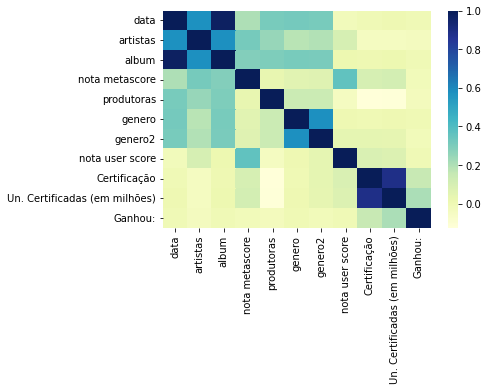

In [ ]:
# Mapa de calor das correlações

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

Os principais pontos a se notar no _heatmap_ são:

A certificação de um álbum e as unidades certificadas possuem correlação próxima de zero com as gravadoras, ou seja, o _label_ de um álbum não parece ser um fator relevante para o sucesso;

As notas de _user score_ e _meta score_ são relativamente correlacionadas, então pode-se dizer que a opinião pública se assemelha a crítica especializada;

Ganhar um Grammy e unidades certificadas são pouco correlacionados, assim como ganhar um Grammy e as notas do público e da crítica. Entende-se, então, que a premiação não influencia diretamente na venda ou nas notas do álbum.

### Describe

Essa função nos dá  um sumário de valores estatísticos das colunas de nosso banco de dados, entre eles temos a média (mean), o desvio padrão (std) e os valores dos quartis. Faremos um para cada uma das três grandes gravadoras e um para o resto.

In [ ]:
#Describe da Universal

universal=dados.loc[dados['gravadoras'] ==  'Universal']
universal.describe()

,data,nota metascore,nota user score,Un. Certificadas (em milhões),Ganhou:
count,526.000000,526.000000,526.000000,526.000000,526.000000
mean,2014.064639,6.932890,7.454943,0.303232,0.036122
std,2.770526,0.981545,1.186722,0.883591,0.215202
min,2010.000000,3.700000,1.500000,0.000000,0.000000
25%,2012.000000,6.300000,6.900000,0.000000,0.000000
50%,2014.000000,7.000000,7.700000,0.000000,0.000000
75%,2016.000000,7.600000,8.300000,0.000000,0.000000
max,2019.000000,9.500000,9.200000,8.000000,2.000000


In [ ]:
#Describe da Sony

sony=dados.loc[dados['gravadoras'] ==  'Sony']
sony.describe()

,data,nota metascore,nota user score,Un. Certificadas (em milhões),Ganhou:
count,368.000000,368.000000,368.000000,368.000000,368.000000
mean,2014.432065,7.096467,7.508967,0.220109,0.021739
std,2.717539,1.010767,1.211615,0.754047,0.179510
min,2010.000000,3.800000,2.100000,0.000000,0.000000
25%,2012.000000,6.500000,7.175000,0.000000,0.000000
50%,2014.000000,7.200000,7.800000,0.000000,0.000000
75%,2017.000000,7.800000,8.300000,0.000000,0.000000
max,2019.000000,9.500000,9.000000,11.000000,2.000000


In [ ]:
#Describe da Warner

warner=dados.loc[dados['gravadoras'] ==  'Warner']
warner.describe()

,data,nota metascore,nota user score,Un. Certificadas (em milhões),Ganhou:
count,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2014.298077,6.992308,7.403205,0.155449,0.009615
std,2.728484,0.919845,1.249845,0.563381,0.126429
min,2010.000000,3.700000,2.100000,0.000000,0.000000
25%,2012.000000,6.300000,7.100000,0.000000,0.000000
50%,2014.000000,7.000000,7.750000,0.000000,0.000000
75%,2017.000000,7.700000,8.200000,0.000000,0.000000
max,2019.000000,9.100000,8.900000,6.000000,2.000000


In [ ]:
#Describe do resto

resto=dados.loc[dados['gravadoras'] !=  'Warner' ]
resto=resto.loc[resto['gravadoras'] !=  'Sony']
resto=resto.loc[resto['gravadoras'] !=  'Universal']
resto.describe()

,data,nota metascore,nota user score,Un. Certificadas (em milhões),Ganhou:
count,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000
mean,2014.350670,7.535362,7.756381,0.005496,0.005094
std,2.804114,0.738579,0.799888,0.098442,0.088039
min,2010.000000,3.400000,1.700000,0.000000,0.000000
25%,2012.000000,7.100000,7.400000,0.000000,0.000000
50%,2014.000000,7.600000,7.900000,0.000000,0.000000
75%,2017.000000,8.000000,8.300000,0.000000,0.000000
max,2019.000000,9.900000,9.300000,3.000000,2.000000


A partir dessas estatísticas é possível notar algumas informações interessantes a respeito das gravadoras musicais em questão.

No quesito notas, entre as três principais gravadoras temos a Sony na liderança com pouca vantagem e Universal e Warner com notas quase iguais, tanto de público quanto de crítica especializada. Todas as outras gravadoras conjuntamente possuem notas médias um pouco mais altas. Isso talvez signifique que músicas menos _mainstream*_ possuam maior qualidade.

*_mainstream_: Cultura de massa; Obras artísticas que visam o grande público.

As três grandes gravadoras detêm o destaque na média de unidades certificadas, como era esperado. A diferença entre elas e as outras gravadoras é extremamente grande, provando que álbuns de gravadoras menores vendem menos que álbuns de gravadoras gigantes.

O mesmo acontece para premiação de Grammy, onde Universal, Warner e Sony claramente possuem muito mais álbuns premiados, principalmente a Universal.

### Boxplot

Os boxplots são muito úteis para visualizar a distribuição e os outliers de um banco de dados.

In [ ]:
# precisamos dividir o metascore por 10 para que ele fique na mesma escala 
# que o user score
dados=pd.read_excel("dados.xlsx")
dados['nota metascore']=dados['nota metascore']/10

In [ ]:
#aqui juntamos as tres grandes em um dataframe apenas para ficar mais facil 
tres = pd.concat([sony, warner, universal])

#### Por gravadora:


Text(0.5, 1.0, 'Com relação ao user score:')

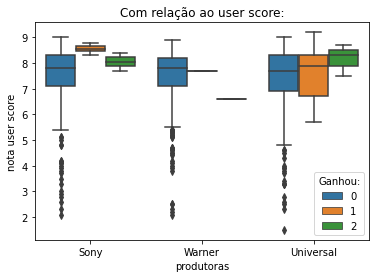

In [ ]:
sns.boxplot(x='gravadoras', y='nota user score', hue='Ganhou:', data=tres).set_title('Com relação ao user score:')

Text(0.5, 1.0, 'Com relação ao metascore:')

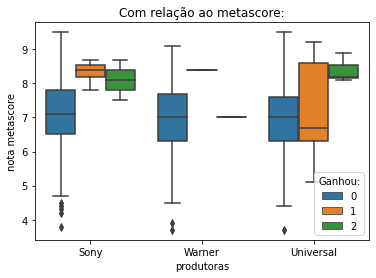

In [ ]:
sns.boxplot(x='gravadoras', y='nota metascore', hue='Ganhou:', data=tres).set_title('Com relação ao metascore:')

Text(0.5, 1.0, 'Com relação as unidades certificadas:')

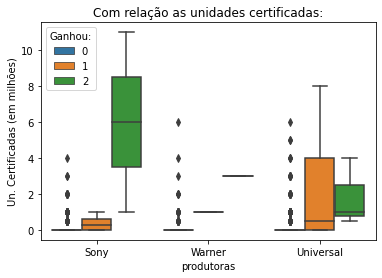

In [ ]:
sns.boxplot(x='gravadoras', 
            y='Un. Certificadas (em milhões)', 
            hue='Ganhou:', 
            data=tres).set_title('Com relação às unidades certificadas:')

#### Por certificação:

Text(0.5, 1.0, 'Com relção ao user score:')

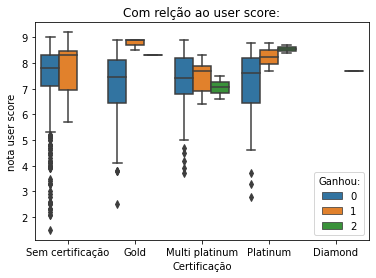

In [ ]:
sns.boxplot(x='Certificação', 
            y='nota user score', 
            hue='Ganhou:', 
            data=tres).set_title('Com relação ao user score:')

Text(0.5, 1.0, 'Com relação ao metascore:')

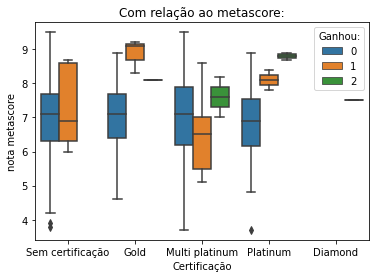

In [ ]:
sns.boxplot(x='Certificação', 
            y='nota metascore', 
            hue='Ganhou:', 
            data=tres).set_title('Com relação ao metascore:')

Relacionando as gravadoras com o _user score_ vimos que elas têm notas médias altas, sendo a Warner dona da menor delas e a com menos indicações ao Grammy. A Universal é a que mais tem indicações. Sendo ela a maior das três, isso se justifica. Esse padrão se repete no _metascore_.

Com relação as unidades certificadas, artistas que nem possuem indicações possuem a menor quantidade, com a exceção de alguns _outliers_. O que nos chama a atenção nesse terceiro gráfico são os altos valores dos ganhadores de Grammy da Sony e dos indicados da Universal, sendo o primeiro o maior de todos. Novamente a Warner foi a que obteve o pior desempenho.

Nos _boxplots_ de certificações podemos observar um padrão bem interessante: artistas sem certificação até são indicados ao Grammy, mas apenas pessoas com alguma premiação da RIAA acabam de fato ganhando. Como não conseguimos identificar apenas pelo gráfico qual evento aconteceu primeiro (Grammy ou certificação) não podemos afirmar qual implica qual, mas fica claro que eles são fortemente correlacionados.

###Wordcloud

O gráfico de nuvem de palavras permitirá observarmos quais gravadoras de álbuns mais aparecem na base de dados, coloridos pela nota média do _metascore_.

In [ ]:
#lendo o banco de dados
dados = pd.read_excel("dados.xlsx")
print(dados)

      data                   artistas  ... Un. Certificadas (em milhões)  Ganhou:
0     2019  Nick Cave & The Bad Seeds  ...                           0.0        0
1     2019                Weyes Blood  ...                           0.0        0
2     2019                Little Simz  ...                           0.0        0
3     2019                   Baroness  ...                           0.0        0
4     2019             Raphael Saadiq  ...                           0.0        0
...    ...                        ...  ...                           ...      ...
4931  2010        The Black Eyed Peas  ...                           0.0        0
4932  2010         Scouting For Girls  ...                           0.0        0
4933  2010                    Santana  ...                           0.0        0
4934  2010               Cyndi Lauper  ...                           0.0        0
4935  2010                  Lil Wayne  ...                           1.0        0

[4936 rows x 11

In [ ]:
#criando dataframe que relaciona as gravadoras com suas notas médias de metascore
x = dados.groupby(['gravadoras'], as_index=False)['nota metascore'].mean()
x 

,produtoras,nota metascore
0,!K7,76.0
1,100% Records,71.0
2,15 Passenger,69.0
3,1965 Records,81.0
4,3D,65.0
...,...,...
944,Zedtone,57.0
945,Zef Recordz,55.0
946,Zoe,63.0
947,Zoo,75.0


In [ ]:
#descrição das médias de metascore
x['nota metascore'].describe()

count    949.000000
mean      74.454953
std        7.493678
min       38.000000
25%       70.000000
50%       75.500000
75%       79.250000
max       99.000000
Name: nota metascore, dtype: float64

In [ ]:
#definindo as cores de cada gravadora, baseado no criterio do metacritic onde:
#obra musical com nota entre 0 e 39 recebe cor VERMELHA
#obra musical com nota entre 40 e 60 recebe cor AMARELA
#obra musical com nota entre 61 e 100 recebe cor VERDE
cor = []
for i in x['nota metascore']:
    if 0 <= i < 21:
        cor.append('Vermelho')
    if 21 <= i < 40:
      cor.append('Laranja')
    if 41 <= i < 61:
        cor.append('Amarelo')
    if 61 <= i < 81:
        cor.append('Verde Claro')
    if 81 <= i < 101:
        cor.append("Verde")

In [ ]:
# ajustando o df x
x = x.drop('nota metascore', 1)
x['cor'] = cor
x

,produtoras,cor
0,!K7,Verde Claro
1,100% Records,Verde Claro
2,15 Passenger,Verde Claro
3,1965 Records,Verde
4,3D,Verde Claro
...,...,...
944,Zedtone,Amarelo
945,Zef Recordz,Amarelo
946,Zoe,Verde Claro
947,Zoo,Verde Claro


In [ ]:
#criando dataframe com as frequencias em que cada gravadora aparece
pcount = df['gravadoras'].value_counts().reset_index()
y = pd.DataFrame(data=pcount)
y = y.rename(columns = {'index': 'gravadoras', 'gravadoras': 'freq'}, inplace = False)
y = y.sort_values(by='gravadoras')
y

,produtoras,freq
74,!K7,11
535,100% Records,1
559,15 Passenger,1
568,1965 Records,1
661,3D,1
...,...,...
933,Zedtone,1
672,Zef Recordz,1
445,Zoe,1
457,Zoo,1


In [ ]:
#unindo os dataframes
z = pd.merge(x, y, how='inner', on='gravadoras')
z = z.rename(columns = {'freq_y': 'freq'}, inplace = False)
z

,produtoras,cor,freq
0,!K7,Verde Claro,11
1,100% Records,Verde Claro,1
2,15 Passenger,Verde Claro,1
3,1965 Records,Verde,1
4,3D,Verde Claro,1
...,...,...,...
944,Zedtone,Amarelo,1
945,Zef Recordz,Amarelo,1
946,Zoe,Verde Claro,1
947,Zoo,Verde Claro,1


In [ ]:
z.to_excel("wordcloud.xlsx")

In [ ]:
#faremos a wordcloud em R, que nos permite trabalhar com graficos de maneira mais assertiva
#carregando os pacotes
%%R
install.packages('wordcloud')
install.packages('readxl')
library(wordcloud)
library(readxl)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/wordcloud_2.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 42454 bytes (41 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
%%R
dados <- read_excel("dados.xlsx", col_names=TRUE)
dados

# A tibble: 4,936 × 11
   data  artistas       album    `nota metascore` produtoras  genero genero2    
   <chr> <chr>          <chr>               <dbl> <chr>       <chr>  <chr>      
 1 2019  Nick Cave & T… Ghosteen               96 Ghosteen    Pop/R… 0          
 2 2019  Weyes Blood    Titanic…               91 Sub Pop     Pop/R… Alternativ…
 3 2019  Little Simz    Grey Ar…               91 Age 101     Rap    0          
 4 2019  Baroness       Gold & …               91 Abraxan Hy… Pop/R… Heavy Metal
 5 2019  Raphael Saadiq Jimmy L…               90 Sony        R&B    0          
 6 2019  Rapsody        Eve                    90 Jamla       Rap    0          
 7 2019  Dave           Psychod…               90 Ind. Albums Rap    0          
 8 2019  Michael Kiwan… Kiwanuka               89 Universal   Pop/R… 0          
 9 2019  Jamila Woods   Legacy!…               89 Jagjaguwar  R&B    0          
10 2019  Angel Olsen    All Mir…               89 Jagjaguwar  Pop/R… 0          
# … w

In [ ]:
%%R
data <- read_excel("wordcloud.xlsx", col_names=TRUE)
data

R[write to console]: New names:
* `` -> ...1



# A tibble: 949 × 4
    ...1 produtoras     cor          freq
   <dbl> <chr>          <chr>       <dbl>
 1     0 !K7            Verde Claro    11
 2     1 100% Records   Verde Claro     1
 3     2 15 Passenger   Verde Claro     1
 4     3 1965 Records   Verde           1
 5     4 3D             Verde Claro     1
 6     5 429 Recordings Verde Claro     1
 7     6 429 Records    Amarelo         4
 8     7 4Ad            Verde Claro    67
 9     8 52Hz           Verde           2
10     9 604 Records    Verde Claro     1
# … with 939 more rows


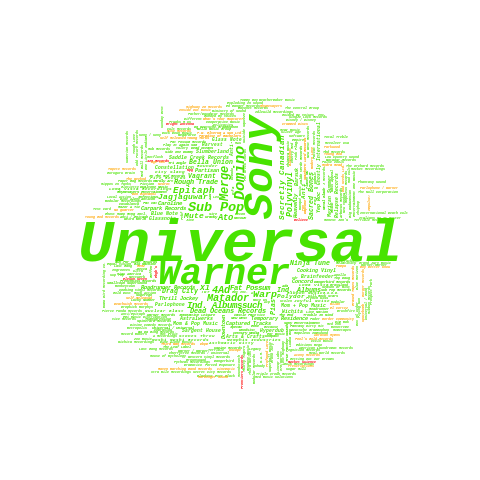

In [ ]:
#criando a wordcloud 
%%R
wordcloud(words = data$gravadoras, 
          freq = data$freq, 
          min.freq = 2,
          scale = c(5, 0.25),
          max.words=1000, 
          random.order=FALSE, rot.per=0.2, 
          ordered.colors=TRUE,
          colors=c('#fe0000', # Vermelho 
                   '#ffcc33', # Laranja
                   '#ffa500', # Amarelo
                   '#48e300', # Verde claro
                   '#1e5e00')[factor(data$cor)], 
          family = "URWBookMan", font = 4)

A _wordcloud_ mostra o que já era esperado: a influência esmagadora das três gravadoras supracitadas. 

Além disso, a cor das cores mostra que a grande maioria das gravadoras detêm obras de qualidade, com notas altas no Metacritic.

## Modelagem

Considerando os dados coletados, vamos realizar uma modelagem para predizer a nota do público para cada álbum ('nota user score').

### Regressão

 Como as certificações podem ser classificadas como dados categóricos ordinais, assim como a coluna "Ganhou:". Vamos primeiro substituir esses para valores como 0,1,2 e assim por diante.

In [ ]:
dados = pd.read_excel('dados.xlsx')

In [ ]:
aux = [] 

for i in dados['Certificação']:
  if (i == "Sem certificação") == True:
    aux.append(0)
  elif (i == 'Gold') == True:
    aux.append(1)
  elif (i == "Platinum") == True:
    aux.append(2)
  elif (i =='Multi platinum') == True:
    aux.append(3)
  elif (i == "Diamond") == True:
    aux.append(4)

dados['Certificação'] = aux

Vamos excluir todas as observações que possuem mais de uma produtora e genero.

In [ ]:
dados = dados[~dados.gravadoras.str.contains('/', na = False)]
dados = dados[~dados.genero.str.contains('/', na = False)]

Dados como "gênero", "Grammy", "data" e "gravadoras" são dados considerados categóricos não-ordinais. Por isso vamos separá-los em _dummies_ . 

Porém, antes de fazer isso, vamos realizar um filtro no nosso dataframe, coletando apenas gravadoras que aparecem mais de uma vez por motivos de limitação de memória.

In [ ]:
# Pega apenas gravadoras e generos cujo a frequencia em nosso df é maior que 10 
filtered = dados.groupby("gravadoras")['gravadoras'].filter(lambda x: len(x) > 2)
filtered2 = dados.groupby("genero")['genero'].filter(lambda x: len(x) > 2)
dados = dados[dados['gravadoras'].isin(filtered)]
dados = dados[dados['genero'].isin(filtered2)]

Agora sim, partimos para os _dummies_:

In [ ]:
dados = pd.get_dummies(dados, columns=['data'])

In [ ]:
dados = pd.get_dummies(dados, columns=['gravadoras'])

In [ ]:
dados = pd.get_dummies(dados, columns=['genero'])

KeyError: ignored

Dados referentes ao álbum e nomes dos cantores podem ser desconsiderados, visto que servem apenas para indexação dos valores e não possuem conteúdo informativo. Por conta do número massivo de informação faltante na coluna do 2º gênero, vamos remover esta coluna também. 

In [ ]:
dados = dados.drop(['album', 'artistas', 'genero2'], axis = 1)

In [ ]:
dados

,nota metascore,nota user score,Certificação,Un. Certificadas (em milhões),Ganhou:,data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,data_2016,data_2017,data_2018,data_2019,produtoras_!K7,produtoras_4Ad,produtoras_A&M,produtoras_Ada,produtoras_Anti,produtoras_Anti-,produtoras_Anticon,produtoras_Arts & Crafts,produtoras_Asthmatic Kitty,produtoras_Astralwerks,produtoras_Ato,produtoras_Because,produtoras_Because Music,produtoras_Bella Union,produtoras_Big Dada,produtoras_Big Machine,produtoras_Blue Note,produtoras_Brainfeeder,produtoras_Caroline,produtoras_City Slang,produtoras_Concord,produtoras_Constellation,produtoras_Cooking Vinyl,produtoras_Dangerbird,produtoras_Daptone,...,genero2_Indie Rock,genero2_Indie/Alternative,genero2_Industrial,genero2_Jazz,genero2_Jazz Instrument,genero2_Latin,genero2_Left-Field Hip-Hop,genero2_Metal,genero2_Metalcore,genero2_Midwest Rap,genero2_Modern Creative,genero2_New Age,genero2_Opera,genero2_Pop,genero2_Pop-Rap,genero2_Pop/Rock,genero2_Progressive Country,genero2_Punk,genero2_R&B,genero2_Rap,genero2_Reggae,genero2_Retro-Soul,genero2_Rock,genero2_Rockabilly,genero2_Singer-Songwriter,genero2_Singer/Songwriter,genero2_Soul,genero2_Soundtrack,genero2_Soundtracks,genero2_Southern Rap,genero2_Stage & Screen,genero2_Standards,genero2_Stoner Metal,genero2_Techno,genero2_Trip-Hop,genero2_Underground Rap,genero2_Urban,genero2_Vocal,genero2_Vocal Music,genero2_West Coast Rap
4,90,5.8,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,90,8.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,89,8.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,89,7.5,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,88,8.1,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,48,5.9,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4931,47,4.8,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4932,47,2.9,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4934,45,4.8,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Neste momento executamos uma regressão linear, onde a variável resposta é o que chamamos de _user score_. 
Foi separado para o conjunto de treinamento 80% do banco de dados original.

In [ ]:
from sklearn.model_selection import train_test_split

X = dados.iloc[:, dados.columns != 'nota user score']

y = dados.iloc[:, dados.columns == 'nota user score']


In [ ]:
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = p, 
                                                    random_state = 42)

In [ ]:
#ajustando o modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#score R^2
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.09897896331089462

## Conclusão

Infelizmente nosso modelo não tem um bom ajuste, trabalharemos mais nele após a entrega desse trabalho, mas isso se justifica por conta da filtragem. Os dados relacionados a gênero e gravadora precisam ser ainda mais lapidados. A limitação de ser linear também agrega negativamente, porém outros modelos mais rebuscados têm um custo computacional maior. 

Percebemos que, embora indústrias independentes tenham menos premiações (Grammy) e menos unidades vendidas, elas agradam mais os críticos e ouvintes.

Era esperado que houvessem gravadoras que se destacassem, que fossem maiores, por serem mais bem estabelecidas no mercado musical, e outras menores lutando para competir com essas. Mas o que vimos é que essas três acabam fagocitando as menores, virando um grande oligopólio musical. As pequenas independentes ainda existem, porém são uma tímida minoria. 

#### Próximos passos

Para melhor responder nossos indagamentos iniciais faremos uma rede neural de _deep learning_.

Faremos também uma série de teste estatísticos para comprovar se realmente existem diferenças significativas entre nossas variáveis.
Também buscaremos complementar nosso banco de dados, adicionando nele outras premiações.